*Machine Learning para Predições em Saúde*

## Análise Descritiva de Dados

#### Audencio Victor

##### Conjunto de Dados Escolhido: Coorte Araraquara Gestantes
##### Objetivo da Análise: predição de Baixo peso ao nascer

##### O Conjunto de dados possui %0 variveis e 1453 observações, com as as seguintes variáveis listadas:

* a_idade: Idade da mãe.
* a_estat1: Possivelmente altura da mãe (início da gravidez).
* b_estat1: Possivelmente altura da mãe (final da gravidez).
* a_pesoat: Peso da mãe (início da gravidez).
* b_pesoat: Peso da mãe (final da gravidez).
* a_pesopre: Peso pré-gravidez da mãe.
* a_rendpcr: Renda per capita da mãe.
* a_civil: Estado civil da mãe.
* a_escola: Nível de escolaridade da mãe.
* a_hb: Nível de hemoglobina da mãe.
* a_hba1c: Nível de Hemoglobina Glicada (HbA1c) da mãe.
* a_hdl: Nível de HDL colesterol da mãe.
* b_ct: Possivelmente outra medida bioquímica ou clínica.
* d_IGUSGrn: Idade gestacional ao nascer (em semanas).
* a_npar: Número de partos anteriores.
* imc: Índice de Massa Corporal (IMC) da mãe.
* categoria: Categoria de peso (Abaixo, Acima, Dentro).
* d_bpn: Indicador de Baixo Peso ao Nascer (BPN).
* gig: Possivelmente Ganho de Peso Gestacional.
* pig: Possivelmente Indicador de Ganho de Peso Insuficiente/Excessivo na Gestação

##### A variável desfecho considerada foi : d_bpn: Indicador de Baixo Peso ao Nascer (BPN).

## Roteiro de Análise
* Instalação de pacotes e Importação de bibliotecas, 
* Verificação o conjunto de dados ,
* Separação de Conjuntos de treino e teste, 
* Criação dummies para as variáveis categóricas, 
* Padronizacao das variveis Continuas, 
* Obtenção da performance do modelo,
* Execução dos algoritmos de machine learning,
* Seleção de variáveis com BORUTA,
* Valores de Shapley

**Descrição:**

A proposta de aprendizado do projeto da disciplina é trabalhar com um problema de classificação, assim o objetivo é construir um modelo de classificação para predição de baixo peso nascença em com base nas caraterísticas maternas e fetais.

Desfecho: É considerado bebe com peso abaixo de 2500g
Variáveis preditoras: Sexo do bebe, idade materna, escolaridade materna, número de consultas pré-natais, raça da mae.






**Instalação de pacotes adicionais**

In [1]:
!pip install dfply 
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Importação de bibliotecas**

In [2]:
import pandas as pd # para processamento de bancos de dados
import numpy as np # para processamento numérico de bancos de dados
import matplotlib # para geração de gráficos
import matplotlib.pyplot as plt # configurações adicionais para os gráficos a serem gerados

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline

import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from dfply import *  # para importar os comandos da biblioteca dfply

import scikitplot as skplt

from dtreeviz.trees import *

import warnings # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# configurações adicionais de figuras
plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})

np.random.seed(42)  # semente de aleatoriedade

In [57]:
# Instalar lightgbm 
!conda install -c conda-forge lightgbm

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
\ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noar

In [1]:
#Chamar o banco de dados 
df = pd.read_csv("DadosMLMBA.csv")
df.head().T

<IPython.core.display.Javascript object>

,0,1,2,3,4
a_idade,36.27,18.83,28.21,26.8,21.67
a_estat1,165.0,163.5,180.0,161.5,152.1
b_estat1,165.2,163.5,181.0,161.5,152.1
a_pesoat,70.2,46.4,61.9,82.0,52.2
b_pesoat,72.8,51.5,65.6,90.4,61.55
a_pesopre,70.2,46.4,61.9,82.0,53.0
a_rendpcr,550.0,825.0,693.333333,1200.0,933.333333
a_civil,2,1,2,2,1
a_escola,11.0,11.0,11.0,14.0,12.0
a_hb,12.3,13.3,11.7,13.0,11.4


In [6]:
# Gerar a matriz de correlação
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'Abaixo'

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar o tamanho da figura
plt.figure(figsize=(20, 15))

# Plotar o mapa de calor da matriz de correlação com ajustes
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            annot_kws={"size": 7}, cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='gray')

# Ajustar os labels dos eixos
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Título do mapa de calor
plt.title('Matriz de Correlação', fontsize=20)

# Mostrar o mapa de calor
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 2000x1500 with 0 Axes>

In [15]:
df.columns  # para ver os nomes das  variveis 

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre',
       'a_rendpcr', 'a_civil', 'a_escola', 'a_hb', 'b_hb', 'a_alcool',
       'b_alcool', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'a_cor', 'a_vigord', 'b_vigord', 'a_moderd',
       'b_moderd', 'b_fumog', 'a_fumog', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct',
       'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_agdm',
       'b_agdm', 'a_aghas', 'b_aghas', 'a_hba1c', 'a_hdl', 'b_ct', 'd_IGUSGrn',
       'a_npar', 'imc', 'categoria', 'd_bpn', 'gig', 'pig'],
      dtype='object')

In [16]:
# Columns
print('List of variables:')
print(list (df.columns.values))

List of variables:
['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre', 'a_rendpcr', 'a_civil', 'a_escola', 'a_hb', 'b_hb', 'a_alcool', 'b_alcool', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 'a_cor', 'a_vigord', 'b_vigord', 'a_moderd', 'b_moderd', 'b_fumog', 'a_fumog', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_agdm', 'b_agdm', 'a_aghas', 'b_aghas', 'a_hba1c', 'a_hdl', 'b_ct', 'd_IGUSGrn', 'a_npar', 'imc', 'categoria', 'd_bpn', 'gig', 'pig']


In [17]:
df.isna()
df.isna().sum()

a_idade           0
a_estat1          0
b_estat1        106
a_pesoat          0
b_pesoat        110
a_pesopre         0
a_rendpcr        11
a_civil           0
a_escola          1
a_hb            232
b_hb            274
a_alcool          0
b_alcool        109
a_npari         573
a_npcomo          0
a_imcpg           0
a_imcga           0
b_imcga         112
a_fmp            30
b_fmp           124
a_cor             0
a_vigord          0
b_vigord        111
a_moderd          0
b_moderd        111
b_fumog         109
a_fumog           0
b_hba1c         275
b_hdl           274
a_ldl           231
a_ct            231
a_pcr           231
b_pcr           275
a_circbracm      28
b_circbracm     123
a_igadums         2
a_agdm            0
b_agdm          111
a_aghas           0
b_aghas         111
a_hba1c         236
a_hdl           231
b_ct            274
d_IGUSGrn         5
a_npar         1433
imc               0
categoria         0
d_bpn             0
gig               0
pig               0


In [19]:
# Fazer imputacao dos missings 
df = df.fillna(df.mean())

/var/folders/qm/3swjm2tx1zxg2g5yhhplbq3m0000gn/T/ipykernel_1287/2489377003.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [20]:
def transform_to_binary(value):
    # Se o valor for igual a 1, retornamos 1, caso contrário, retornamos 0
    return 1 if value == 1 else 0

columns_to_transform = ['b_alcool', 'b_vigord', 'b_moderd', 'b_fumog', 'b_agdm', 'b_aghas']

for column in columns_to_transform:
    df[column] = df[column].apply(transform_to_binary)

In [21]:
# Para as variáveis categóricas iremos criar dummies/ One hotencode
df= pd.get_dummies(df, columns=['a_civil', 'a_cor','a_alcool','b_alcool','a_vigord', 'b_vigord', 'a_moderd', 'b_moderd',
                                'b_fumog', 'a_fumog', 'a_agdm','b_agdm', 'a_aghas', 'b_aghas'])

<IPython.core.display.Javascript object>

In [22]:
df.drop(['imc','a_npar', 'a_npari','b_pesoat','categoria','gig', 'pig', 'd_IGUSGrn'], axis=1, inplace=True)

In [23]:
# defenindo a variavel desfecho 
target = df['d_bpn']  #target variable to predict
df = df.select_dtypes(exclude=[object])

In [24]:
target

0       0
1       0
2       0
3       0
4       0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
Name: d_bpn, Length: 1435, dtype: int64

In [25]:
df.describe()

,a_idade,a_estat1,b_estat1,a_pesoat,a_pesopre,a_rendpcr,a_escola,a_hb,b_hb,a_npari,...,a_fumog_0,a_fumog_1,a_agdm_0,a_agdm_1,b_agdm_0,b_agdm_1,a_aghas_0,a_aghas_1,b_aghas_0,b_aghas_1
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,...,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,27.186202,161.882174,161.450993,70.342502,70.269408,790.095567,10.891911,12.497589,11.846339,1.544084,...,0.923345,0.076655,0.949826,0.050174,0.926132,0.073868,0.928223,0.071777,0.931707,0.068293
std,6.604297,6.214142,10.346889,17.577683,17.789623,551.443247,2.343609,0.856041,0.799776,0.956452,...,0.266136,0.266136,0.218380,0.218380,0.261646,0.261646,0.258208,0.258208,0.252335,0.252335
min,0.240000,142.500000,1.550000,4.970000,1.110000,0.000000,0.000000,8.200000,7.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.070000,157.500000,158.000000,57.375000,57.325000,422.500000,10.000000,12.100000,11.400000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,26.670000,161.600000,161.450993,67.500000,67.350000,666.666667,11.000000,12.497589,11.846339,1.544084,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,31.810000,166.000000,165.800000,80.400000,80.100000,1000.000000,12.000000,13.000000,12.300000,1.544084,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,69.940000,182.000000,182.000000,160.150000,160.150000,5800.000000,24.000000,15.900000,15.100000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a_idade      1435 non-null   float64
 1   a_estat1     1435 non-null   float64
 2   b_estat1     1435 non-null   float64
 3   a_pesoat     1435 non-null   float64
 4   a_pesopre    1435 non-null   float64
 5   a_rendpcr    1435 non-null   float64
 6   a_escola     1435 non-null   float64
 7   a_hb         1435 non-null   float64
 8   b_hb         1435 non-null   float64
 9   a_npari      1435 non-null   float64
 10  a_npcomo     1435 non-null   float64
 11  a_imcpg      1435 non-null   float64
 12  a_imcga      1435 non-null   float64
 13  b_imcga      1435 non-null   float64
 14  a_fmp        1435 non-null   float64
 15  b_fmp        1435 non-null   float64
 16  b_hba1c      1435 non-null   float64
 17  b_hdl        1435 non-null   float64
 18  a_ldl        1435 non-null   float64
 19  a_ct  

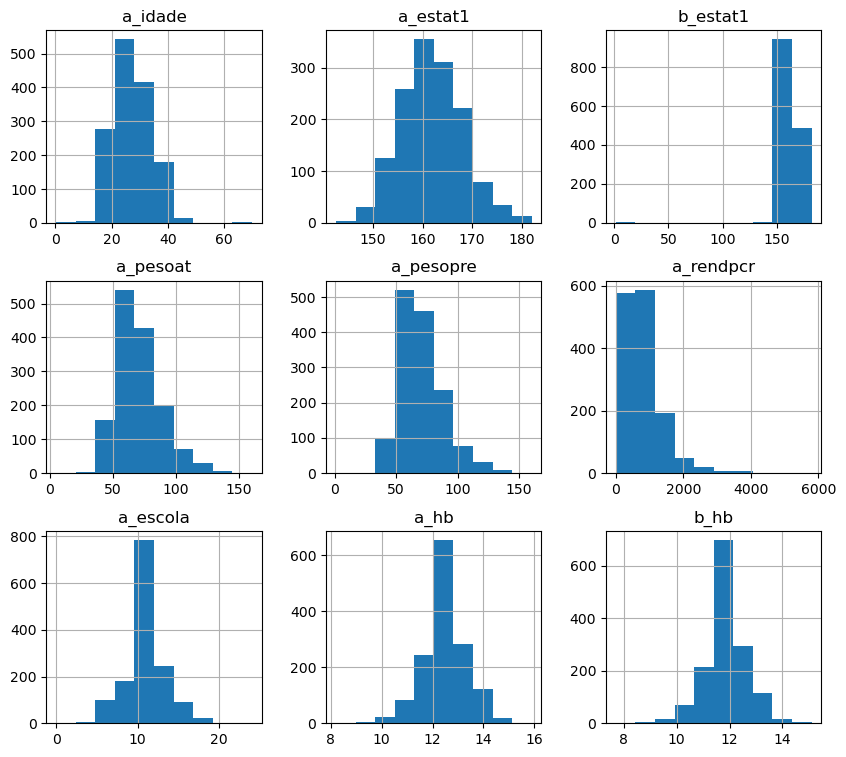

In [28]:
# construcao de graficos de variaves quantitativas 
df_reduced= df[list(df.columns)[0:9]]
df_reduced.hist(figsize=[10,9]);      


<IPython.core.display.Javascript object>

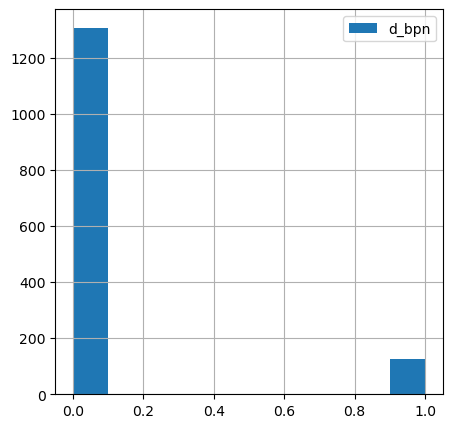

In [29]:
#Plot histogram of target
df['d_bpn'].hist(figsize=[5,5], legend=True, xlabelsize=10)
plt.show()

In [30]:
import pandas as pd

# Supondo que "df" seja o nome do seu DataFrame
correlation_matrix = df.corr()

print(correlation_matrix)


            a_idade  a_estat1  b_estat1  a_pesoat  a_pesopre  a_rendpcr  \
a_idade    1.000000  0.030988  0.049220  0.273799   0.245970   0.119452   
a_estat1   0.030988  1.000000  0.562928  0.336729   0.328738   0.047425   
b_estat1   0.049220  0.562928  1.000000  0.204491   0.200353   0.006773   
a_pesoat   0.273799  0.336729  0.204491  1.000000   0.966384   0.028291   
a_pesopre  0.245970  0.328738  0.200353  0.966384   1.000000   0.021223   
...             ...       ...       ...       ...        ...        ...   
b_agdm_1   0.114310  0.030447  0.034826  0.156841   0.163265  -0.041005   
a_aghas_0 -0.171103 -0.023398 -0.016303 -0.293927  -0.281398   0.052354   
a_aghas_1  0.171103  0.023398  0.016303  0.293927   0.281398  -0.052354   
b_aghas_0 -0.151866 -0.003534 -0.013824 -0.286439  -0.270478   0.025766   
b_aghas_1  0.151866  0.003534  0.013824  0.286439   0.270478  -0.025766   

           a_escola      a_hb      b_hb   a_npari  ...  a_fumog_0  a_fumog_1  \
a_idade    0.141560

Conjuntos de treino e teste

In [46]:
variaveis_preditoras = df.iloc[:, df.columns != 'd_bpn']
classe = df.iloc[:, df.columns == 'd_bpn']
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras, 
                                                    classe,
                                                    train_size = 0.80,
                                                    random_state = 45)

<IPython.core.display.Javascript object>

In [47]:
X_train.shape

(1148, 73)

In [48]:
X_test.shape

(287, 73)

In [49]:
 X_test.columns

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga',
       'b_imcga', 'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct',
       'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c',
       'a_hdl', 'b_ct', 'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4',
       'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0',
       'a_alcool_1', 'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1',
       'a_vigord_2', 'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6',
       'a_vigord_7', 'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1',
       'a_moderd_2', 'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6',
       'a_moderd_7', 'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1',
       'a_fumog_0', 'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0',
       'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1'],
      dtype=

In [50]:
X_train.columns

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga',
       'b_imcga', 'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct',
       'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c',
       'a_hdl', 'b_ct', 'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4',
       'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0',
       'a_alcool_1', 'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1',
       'a_vigord_2', 'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6',
       'a_vigord_7', 'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1',
       'a_moderd_2', 'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6',
       'a_moderd_7', 'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1',
       'a_fumog_0', 'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0',
       'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1'],
      dtype=

In [51]:
# Standarscaler com passthrough tem um problema de ordenação das colunas. Quando aplicamos, ele fornce o resultado com as colunas padronizadas em primeiro, seguidas das demais colunas.
# Para resolver este problema, iremos ordenar as nossas colunas alocando as contínuas nas primeiras posições 

X_train = X_train.loc[:,['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre','a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo','a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 
       'b_hba1c', 'b_hdl','a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm',
       'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct', ## variaveis continuas
       'a_civil_1', 'a_civil_2','a_civil_3', 'a_civil_4', 'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4',
        'a_cor_5', 'a_alcool_0', 'a_alcool_1', 'b_alcool_0', 'b_alcool_1','a_vigord_0', 'a_vigord_1',
        'a_vigord_2', 'a_vigord_3', 'a_vigord_4','a_vigord_5', 'a_vigord_6', 'a_vigord_7', 'b_vigord_0',
        'b_vigord_1', 'a_moderd_0', 'a_moderd_1', 'a_moderd_2', 'a_moderd_3', 'a_moderd_4','a_moderd_5',
        'a_moderd_6', 'a_moderd_7', 'b_moderd_0', 'b_moderd_1','b_fumog_0', 'b_fumog_1', 'a_fumog_0', 
        'a_fumog_1', 'a_agdm_0','a_agdm_1', 'b_agdm_0', 'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0',
        'b_aghas_1']]

X_test = X_test.loc[:,['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat','a_pesopre','a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo','a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 
       'b_hba1c', 'b_hdl','a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm',
       'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct', ## variaveis continuas
       'a_civil_1', 'a_civil_2','a_civil_3', 'a_civil_4', 'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4',
        'a_cor_5', 'a_alcool_0', 'a_alcool_1', 'b_alcool_0', 'b_alcool_1','a_vigord_0', 'a_vigord_1',
        'a_vigord_2', 'a_vigord_3', 'a_vigord_4','a_vigord_5', 'a_vigord_6', 'a_vigord_7', 'b_vigord_0',
        'b_vigord_1', 'a_moderd_0', 'a_moderd_1', 'a_moderd_2', 'a_moderd_3', 'a_moderd_4','a_moderd_5',
        'a_moderd_6', 'a_moderd_7', 'b_moderd_0', 'b_moderd_1','b_fumog_0', 'b_fumog_1', 'a_fumog_0', 
        'a_fumog_1', 'a_agdm_0','a_agdm_1', 'b_agdm_0', 'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0',
        'b_aghas_1']]

X_train_columns = X_train.columns
X_test_columns = X_test.columns

Padronizacao das variveis Continuas 


In [52]:
from sklearn.compose import ColumnTransformer

### variáveis contínuas que serão padronizadas
continuous_cols = ['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre','a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo','a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 
       'b_hba1c', 'b_hdl','a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm',
       'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct']

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' # utilizamos para manter as colunas em que não aplicamos o scaler
  )
  return ct
  
scaler = setScaler()

<IPython.core.display.Javascript object>

In [53]:
scaler.fit(X_train)

ValueError: A given column is not a column of the dataframe

In [54]:
X_train = scaler.transform(X_train)

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [30]:
X_test = scaler.transform(X_test)

In [31]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [32]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [33]:
X_train.head()

,a_idade,a_estat1,b_estat1,a_pesoat,b_pesoat,a_pesopre,a_rendpcr,a_escola,a_hb,b_hb,...,a_fumog_0,a_fumog_1,a_agdm_0,a_agdm_1,b_agdm_0,b_agdm_1,a_aghas_0,a_aghas_1,b_aghas_0,b_aghas_1
0,-0.79,1.38,0.00,-0.18,0.02,-0.20,-0.63,0.02,-0.55,-0.01,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
1,0.05,-1.28,-0.66,-1.02,-1.06,-1.09,0.82,0.02,0.59,0.06,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
2,-1.07,0.80,0.47,-0.08,-0.12,-0.01,-0.56,0.44,0.94,-0.01,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3,-1.14,-0.41,-0.17,-0.83,-0.94,-1.02,-0.23,-0.40,1.05,-0.01,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
4,-0.99,-1.52,-0.80,-1.00,-1.07,-1.19,0.24,-0.40,0.82,-0.57,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00


In [34]:
X_test.describe()

,a_idade,a_estat1,b_estat1,a_pesoat,b_pesoat,a_pesopre,a_rendpcr,a_escola,a_hb,b_hb,...,a_fumog_0,a_fumog_1,a_agdm_0,a_agdm_1,b_agdm_0,b_agdm_1,a_aghas_0,a_aghas_1,b_aghas_0,b_aghas_1
count,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,...,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00,287.00
mean,0.02,-0.09,0.00,0.12,0.09,0.14,-0.06,-0.14,0.09,-0.04,...,0.92,0.08,0.94,0.06,0.93,0.07,0.90,0.10,0.91,0.09
std,1.13,0.96,0.51,1.10,1.08,1.10,0.77,0.89,0.90,1.04,...,0.27,0.27,0.23,0.23,0.25,0.25,0.30,0.30,0.29,0.29
min,-4.19,-2.38,-1.28,-1.89,-1.91,-1.86,-1.39,-2.91,-2.62,-4.22,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.85,-0.40,-0.68,-0.68,-0.65,-0.57,-0.40,-0.32,-0.57,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
50%,-0.11,-0.09,0.00,-0.11,-0.07,-0.08,-0.23,0.02,0.02,-0.01,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
75%,0.78,0.62,0.37,0.74,0.66,0.75,0.35,0.02,0.71,0.44,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,6.66,2.88,1.66,5.25,5.11,5.19,3.31,3.36,2.43,3.08,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [35]:
# transformando Y --> 1 e N --> 0 
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [36]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

Função auxiliar RunModel (Rodando o modelo )

In [37]:
# Criando uma função para obtenção dos principais indicadores de performance do modelo
def runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title="", pos_label=1):
    """Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor de y_train e y_test que representa a classe positiva. O valor default é 1. 

    """
    clf = model
    name = title
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)
    else:  # usar decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    if confusion_matrix:
       skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=normalizeCM, title=name)
    if roc:
       skplt.metrics.plot_roc(y_test, prob_pos, plot_micro=False, plot_macro=False, classes_to_plot=[1], title=name,figsize=(10,10))
     
            
    prob_pos = prob_pos[:,1]
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=pos_label)
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tROC(AUC) %1.3f" % roc_auc_score(y_test, prob_pos))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        
    if plot_calibration:
      
      fraction_of_positives, mean_predicted_value = \
                calibration_curve(y_test, prob_pos, n_bins=10)
      plt.rcParams.update({'font.size': 22})
      plt.rc('legend',**{'fontsize':22})
      fig = plt.figure(3, figsize=(10, 10))
      ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
      ax2 = plt.subplot2grid((3, 1), (2, 0))
      ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado",)
      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label="%s (%1.3f)" % (name, clf_score))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                     histtype="step", lw=2)

      ax1.set_ylabel("Fração de positivos")
      ax1.set_ylim([-0.05, 1.05])
      ax1.legend(loc="lower right")
      ax1.set_title('Gráfico de Calibração  (reliability curve)')
      
      ax2.set_xlabel("Valor médio predito")
      ax2.set_ylabel("Quantidade")
      ax2.legend(loc="upper center", ncol=2)
      
      for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(22)
        
      for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(22)
      
      plt.tight_layout()
      plt.show()

In [38]:
# Função de best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [39]:
help(runModel)

Help on function runModel in module __main__:

runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title='', pos_label=1)
    Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor

Execução dos algoritmos de machine learning

Random Forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# modelo random forest
rf = RandomForestClassifier(random_state=42, verbose=1)

Otimização de hiperparâmetros

In [42]:
np.random.seed(45)

# Número de árvores no Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Número de features a serem consideradas a cada split
max_features = ['log2', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada leaf node
min_samples_leaf = [2, 4]
# Método de seleção das amostras para treinamento de cada árvore
bootstrap = [True, False]
# Criação do param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth#,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

# Caso deseje rodar GridSearchCV, troque a linha abaixo pela que segue
#cv_rf = GridSearchCV(fit_rf, cv=3, param_grid=param_grid,n_jobs = -1) 

cv_rf = RandomizedSearchCV(rf, n_iter=30, cv=2, verbose=1, param_distributions=param_grid,n_jobs = -1)

In [43]:
# A Otimizacao dos  hiperparâmetros
cv_rf.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 550 out of 550 | elapse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 325 out of 325 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[P

[Parallel(n_jobs=1)]: Done 550 out of 550 | elapsed:    0.9s finished


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(random_state=42, verbose=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 16, 20],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   verbose=1)

In [44]:
# melhores estimadores
rf = cv_rf.best_estimator_
rf

RandomForestClassifier(max_depth=20, n_estimators=550, random_state=42,
                       verbose=1)

In [45]:
# modelo random forest otimizado
rf = RandomForestClassifier(max_depth=5, max_features='log2', random_state=42,
                       verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Random_Forest:
	Brier: 0.084
	ROC(AUC) 0.713
	Precision: 0.000
	Recall: 0.000
	F1: 0.000



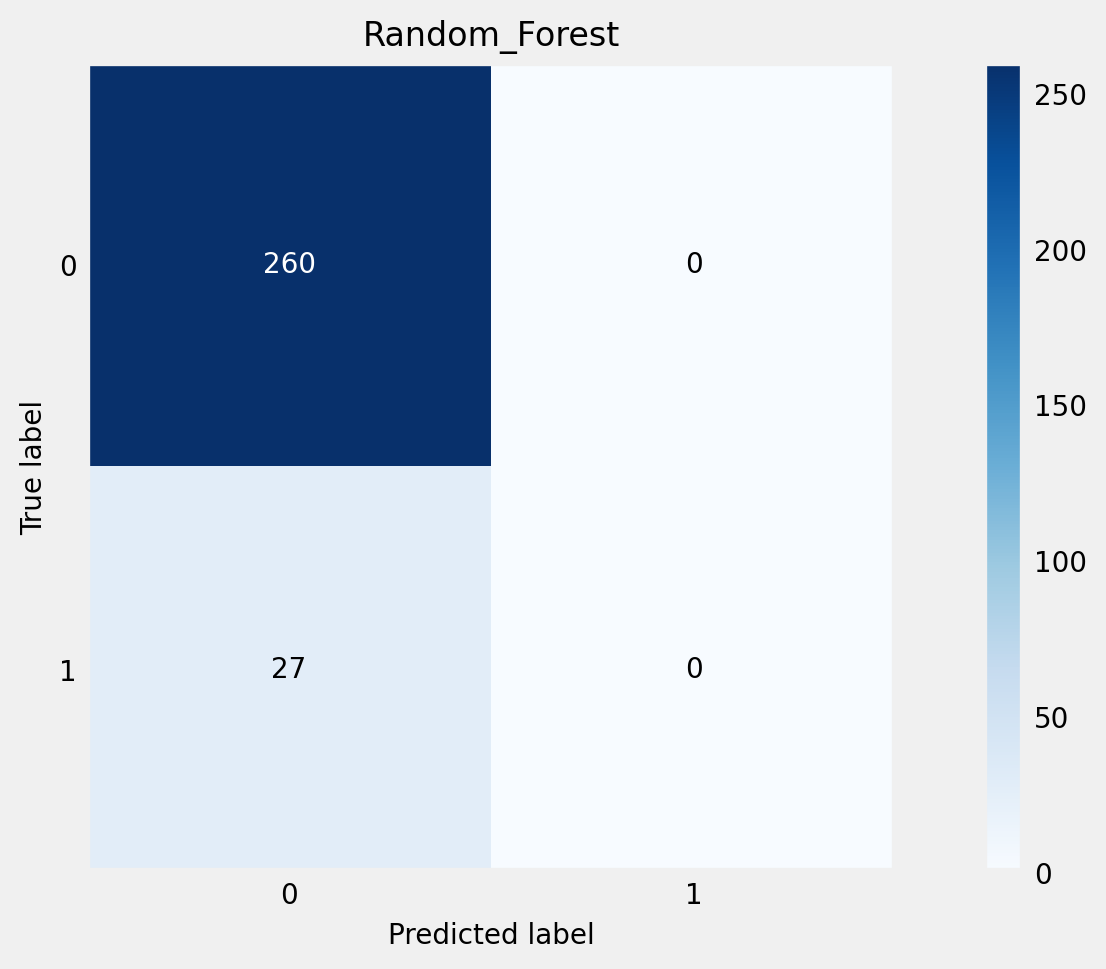

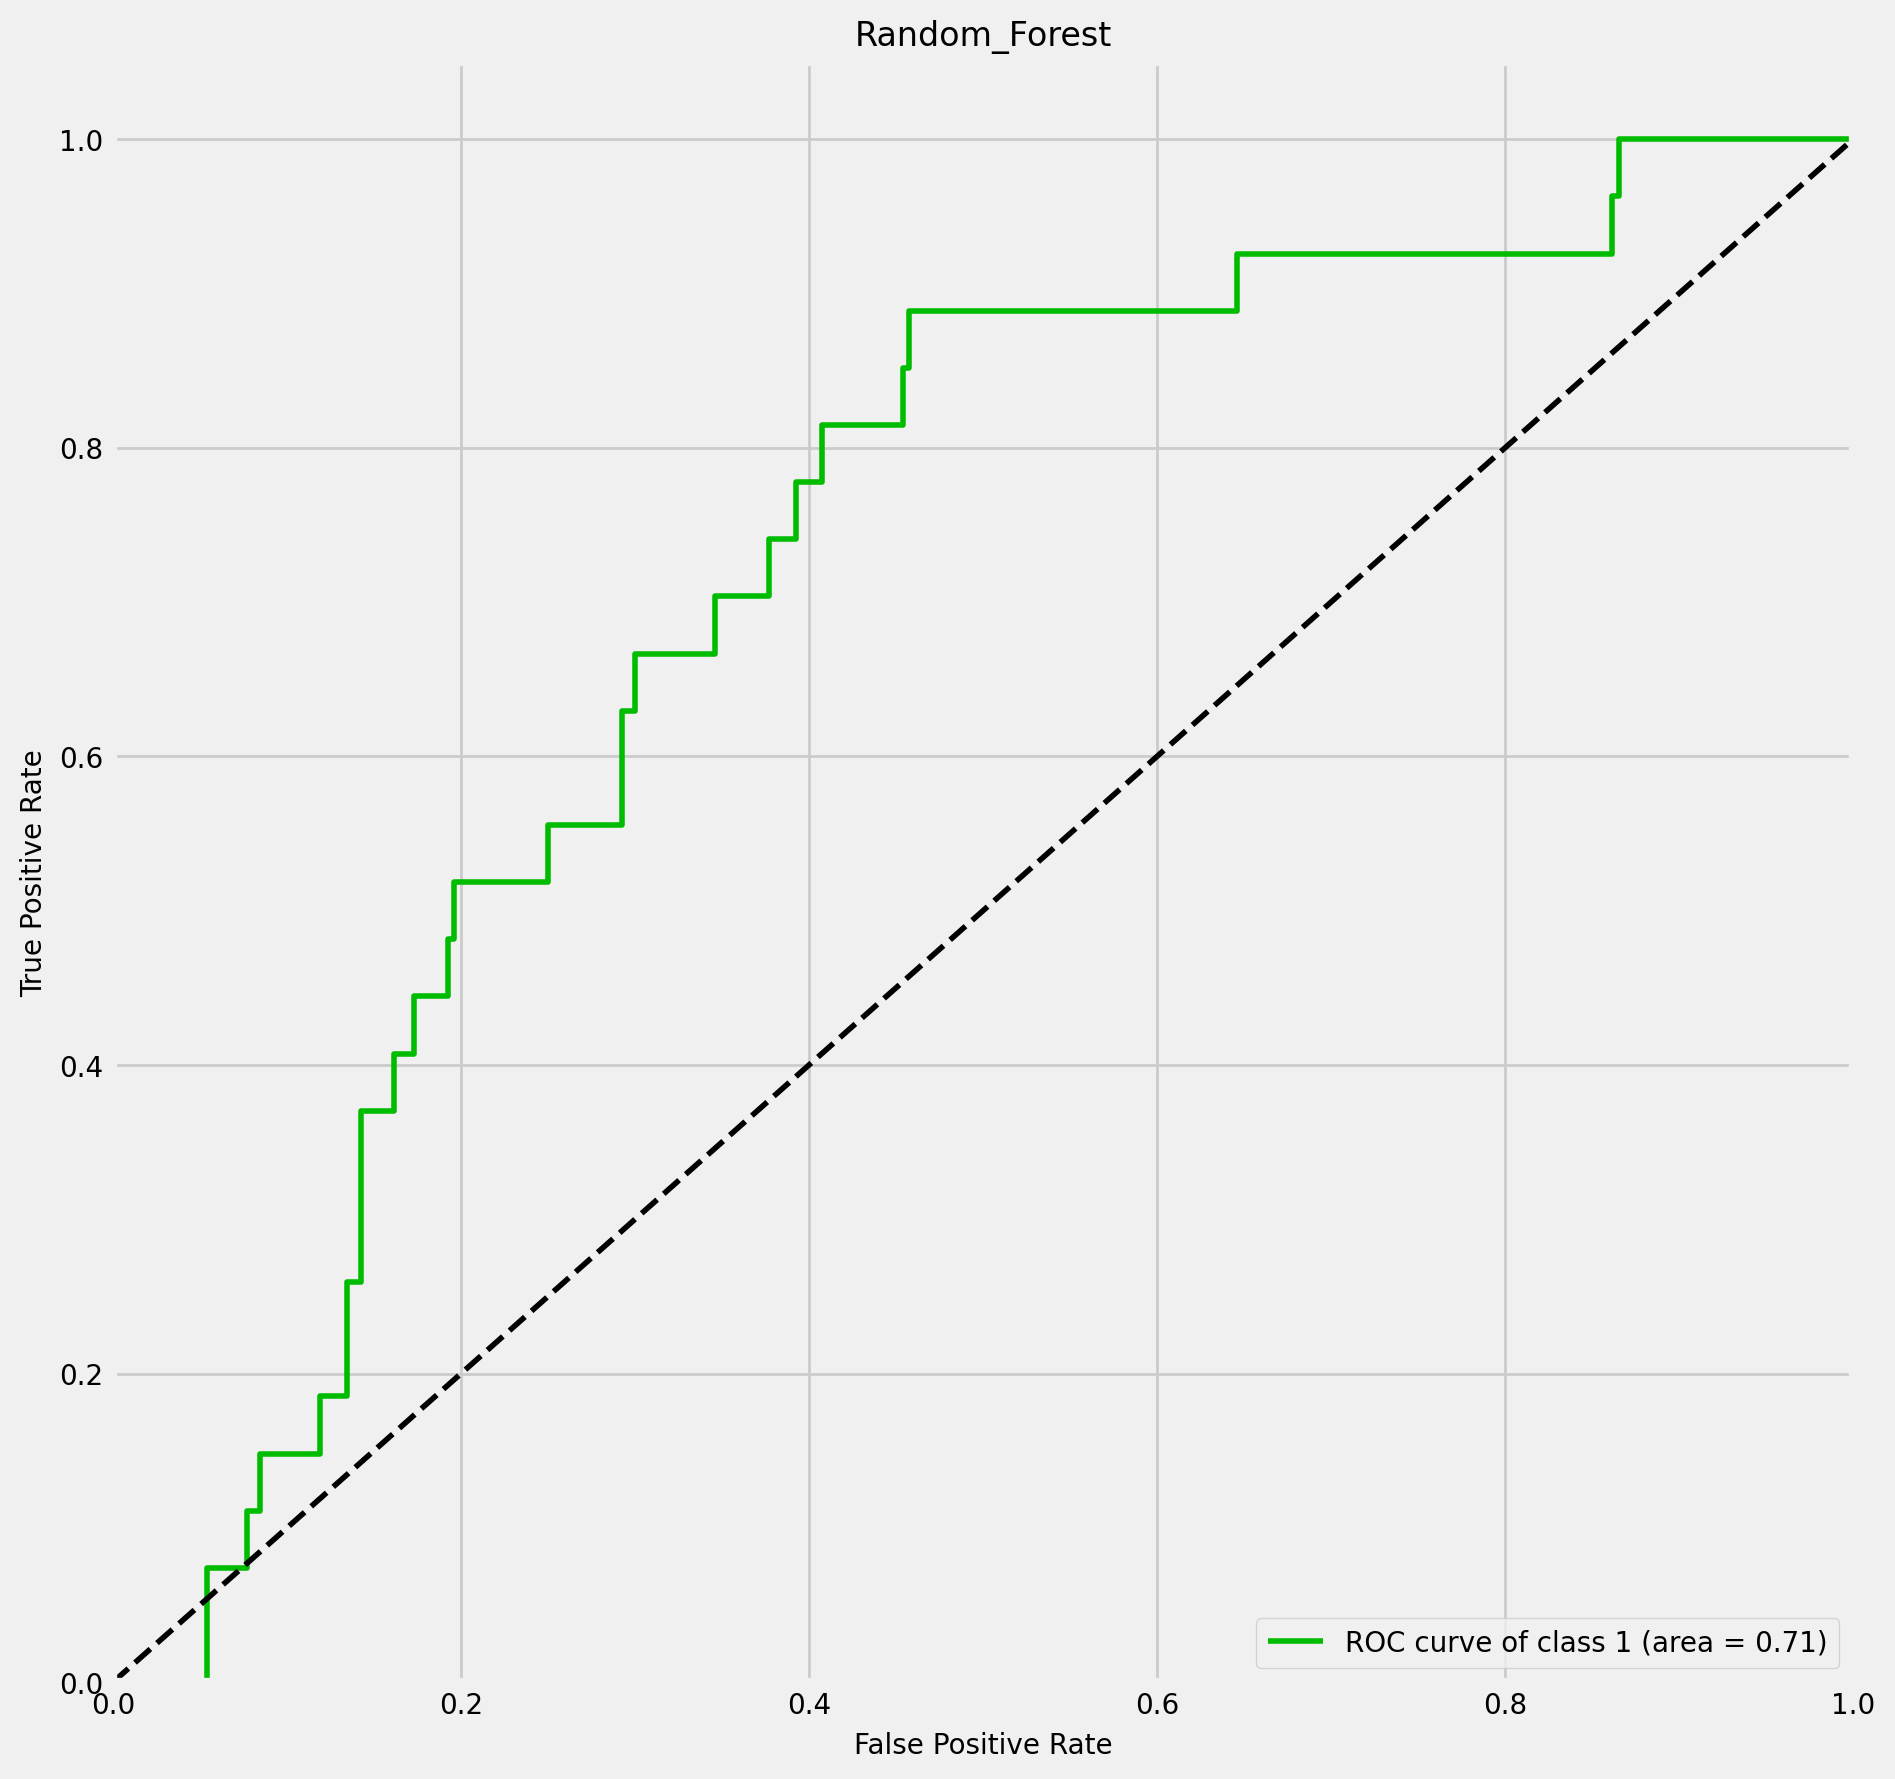

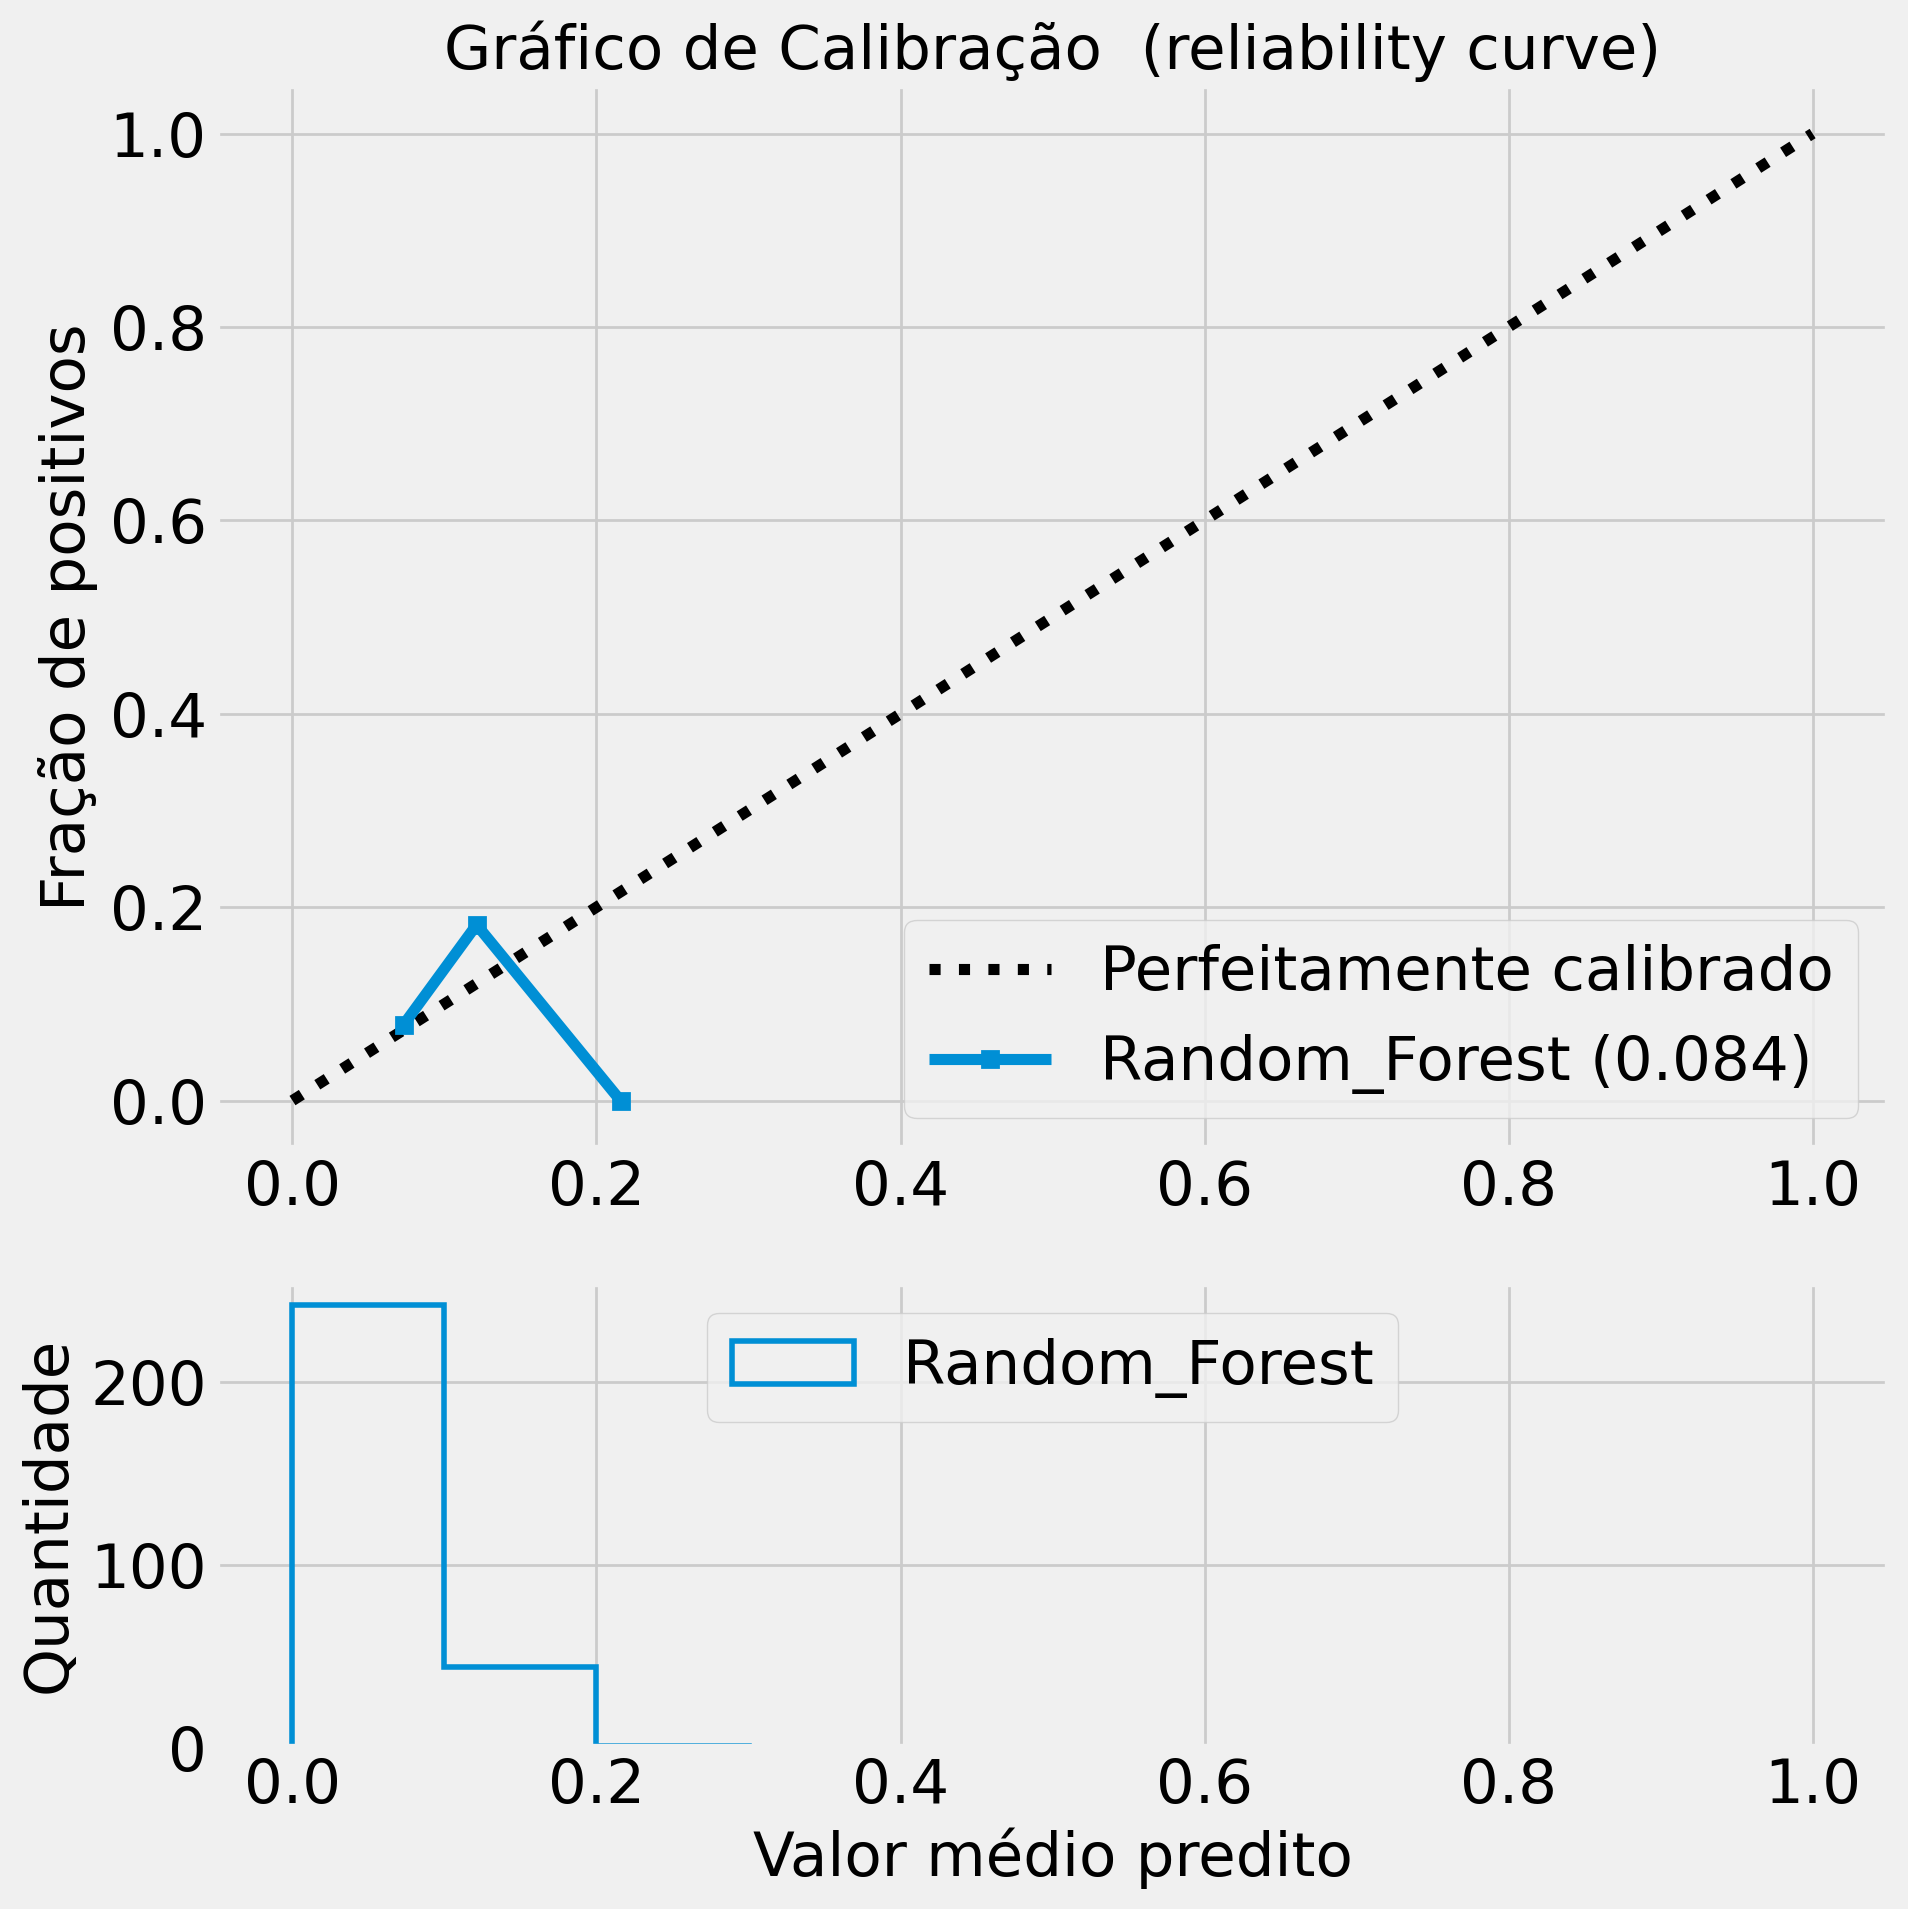

In [46]:
# performance do modelo
runModel (rf, X_train, y_train, X_test, y_test, title="Random_Forest")


XGBOOST

XGBoost:
	Brier: 0.089
	ROC(AUC) 0.615
	Precision: 1.000
	Recall: 0.037
	F1: 0.071



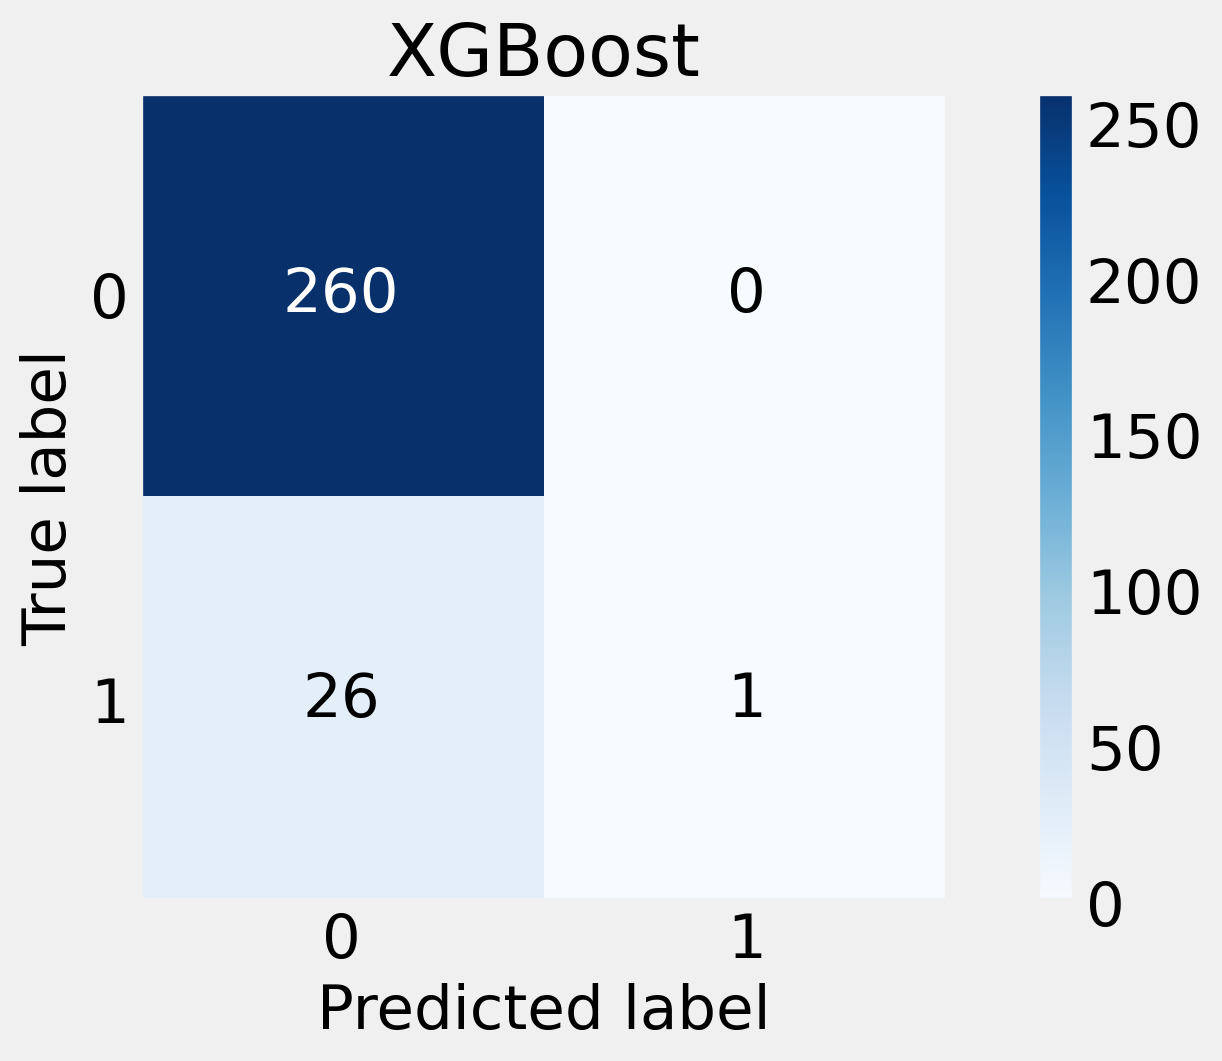

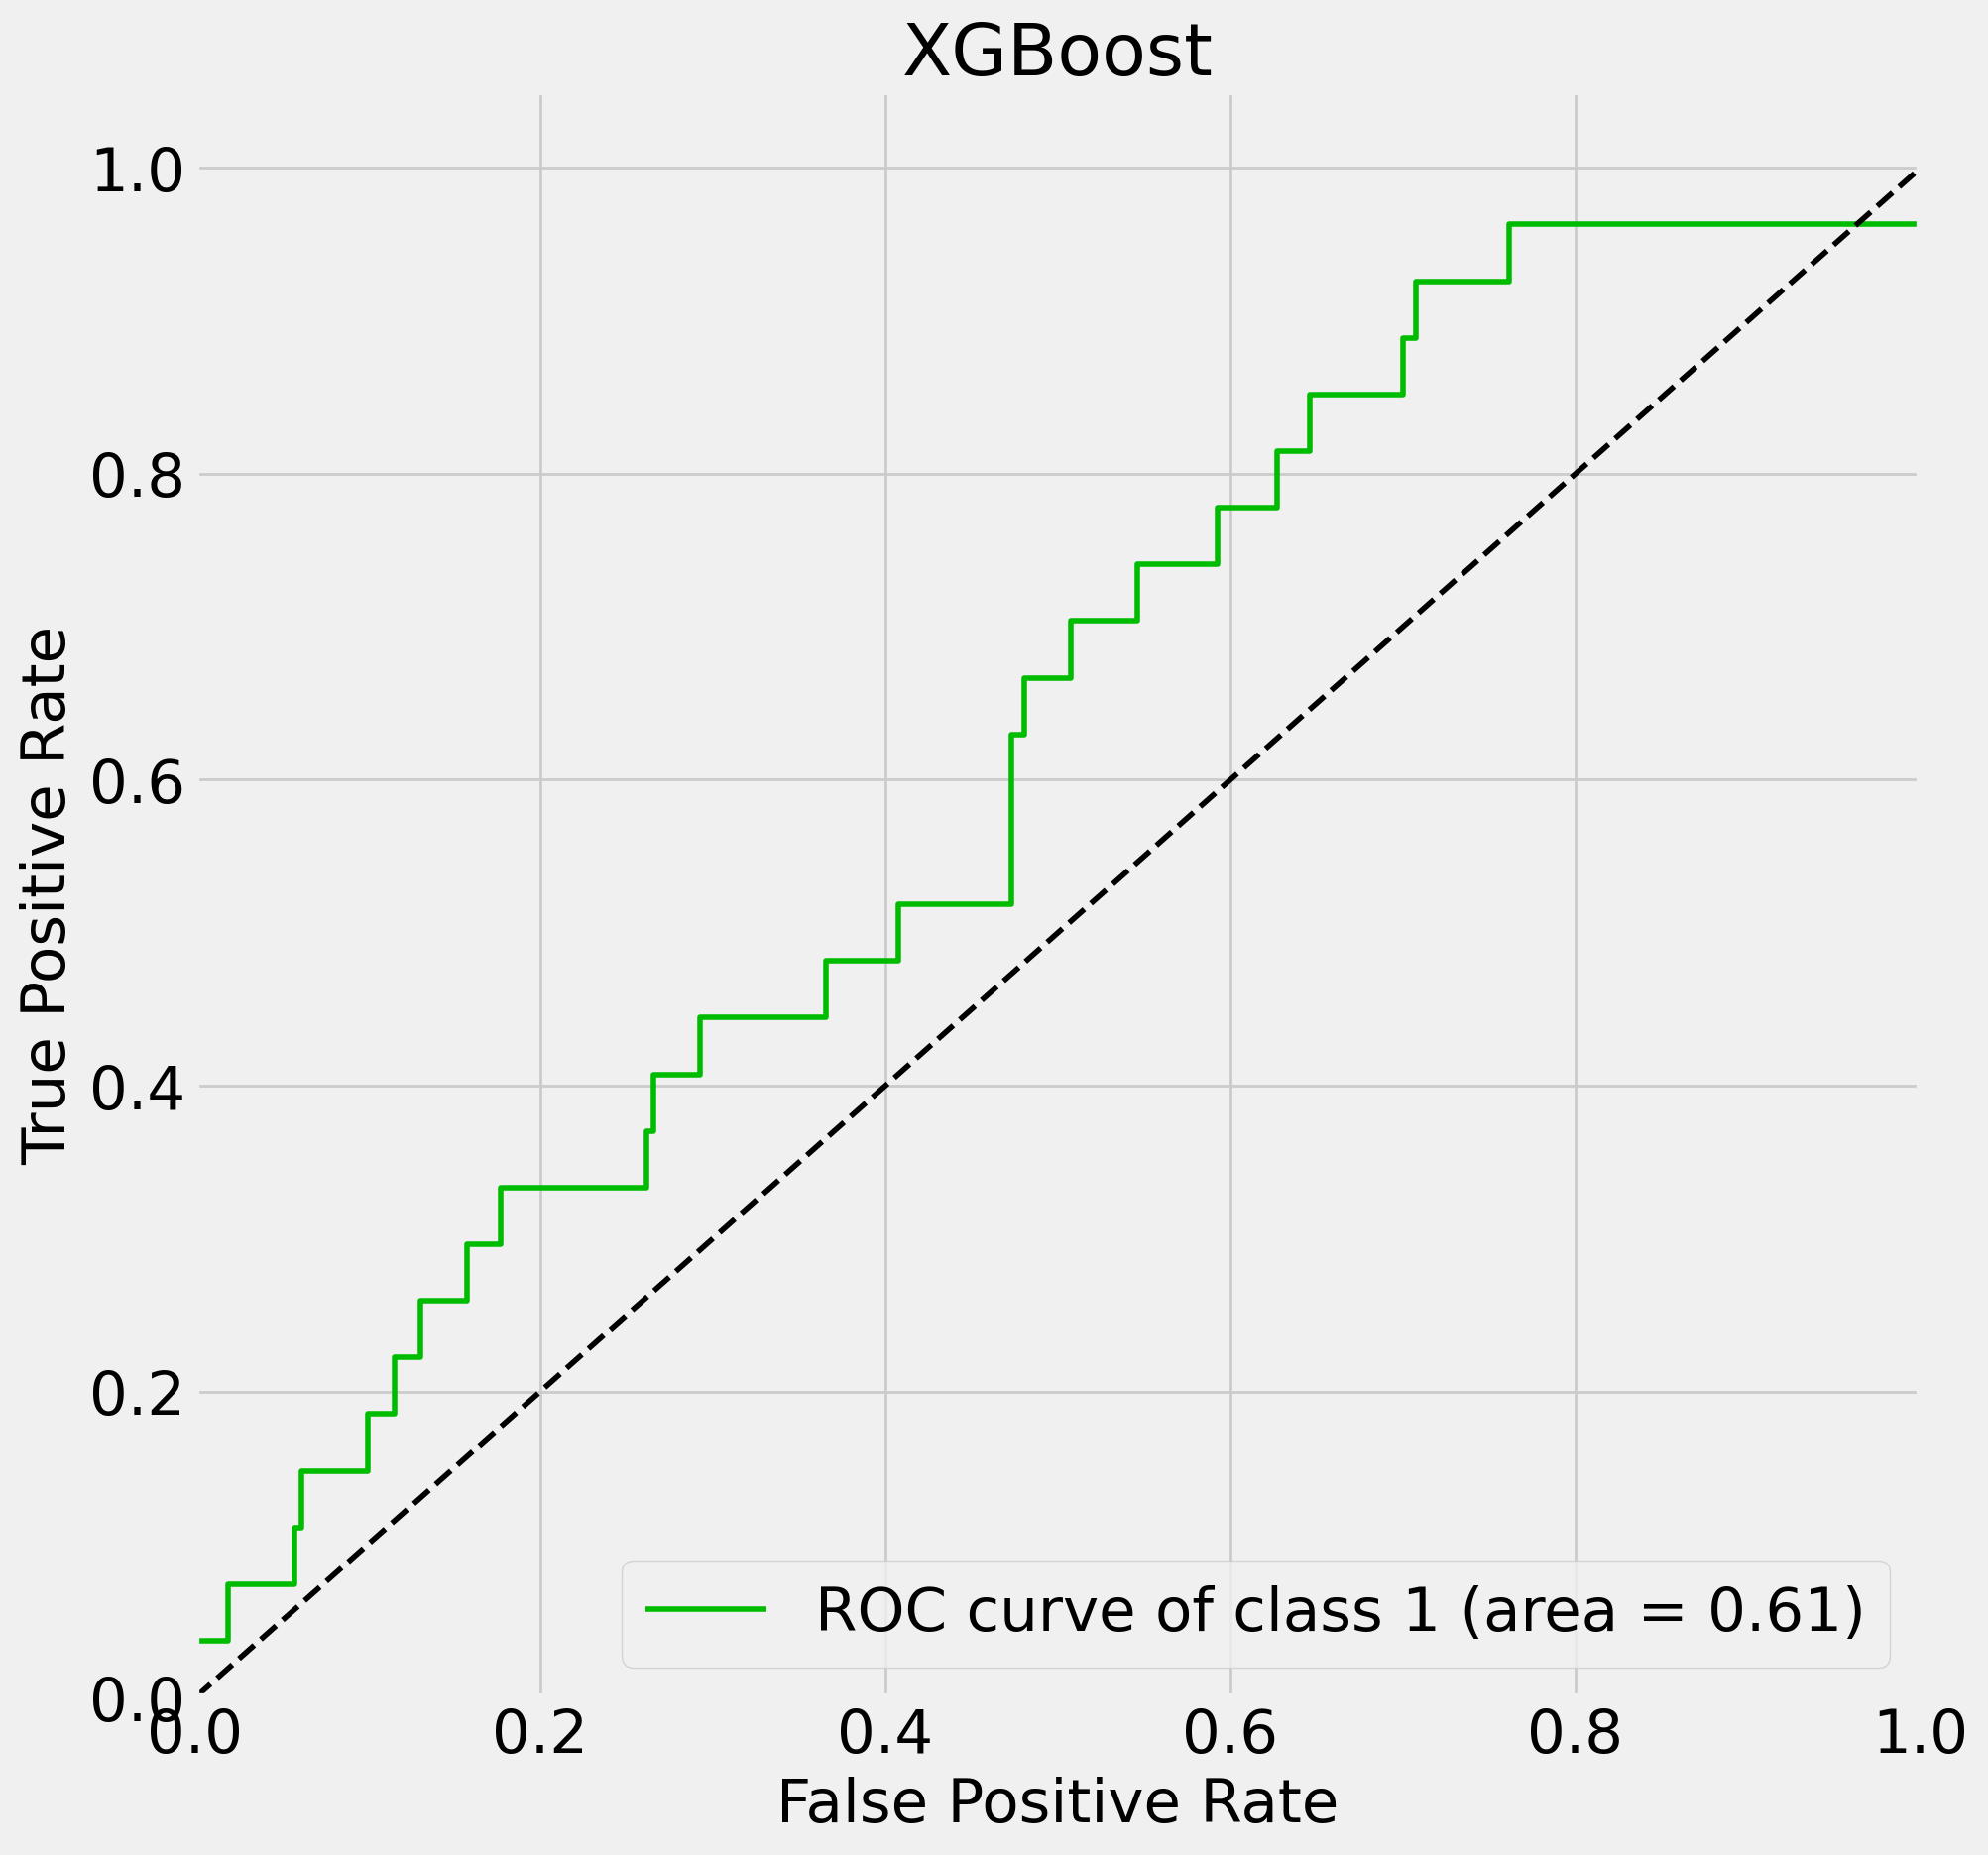

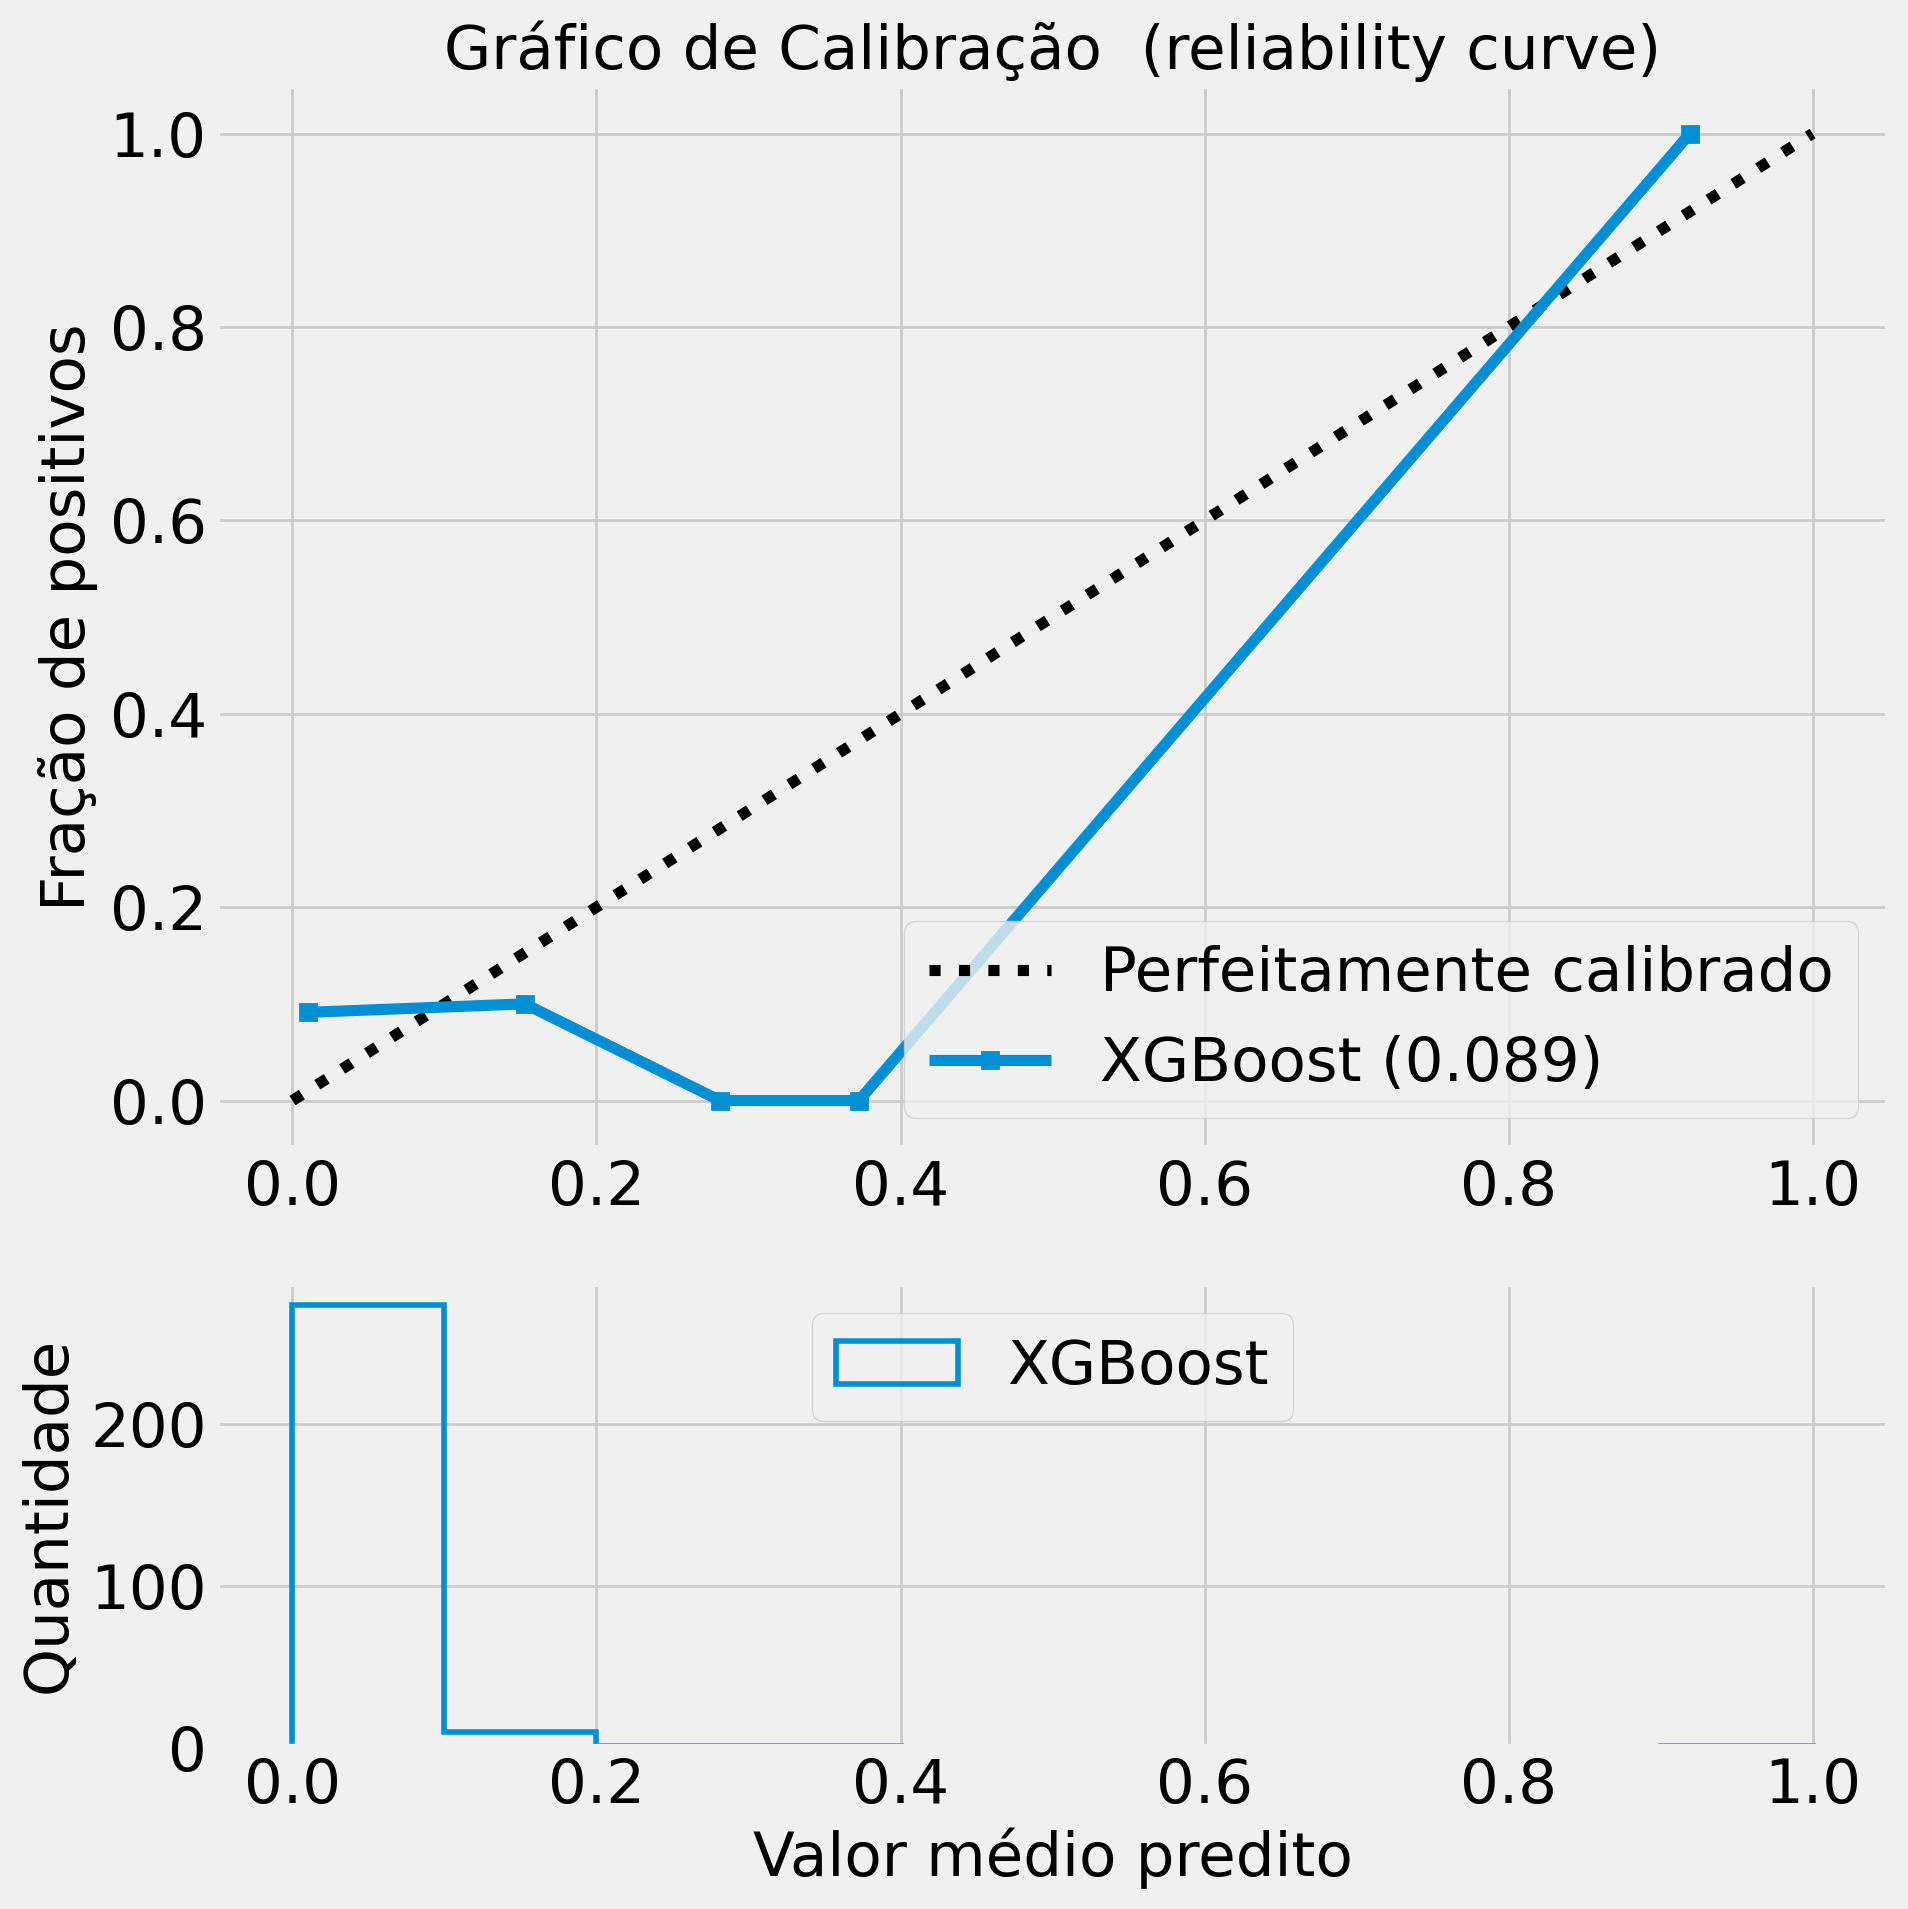

In [47]:
import xgboost as xgb
model = xgb.XGBClassifier()
runModel(model, X_train, y_train, X_test, y_test, title="XGBoost")

LightGBM

[LightGBM] [Info] Number of positive: 99, number of negative: 1049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4280
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086237 -> initscore=-2.360473
[LightGBM] [Info] Start training from score -2.360473
LightGBM:
	Brier: 0.089
	ROC(AUC) 0.623
	Precision: 1.000
	Recall: 0.037
	F1: 0.071



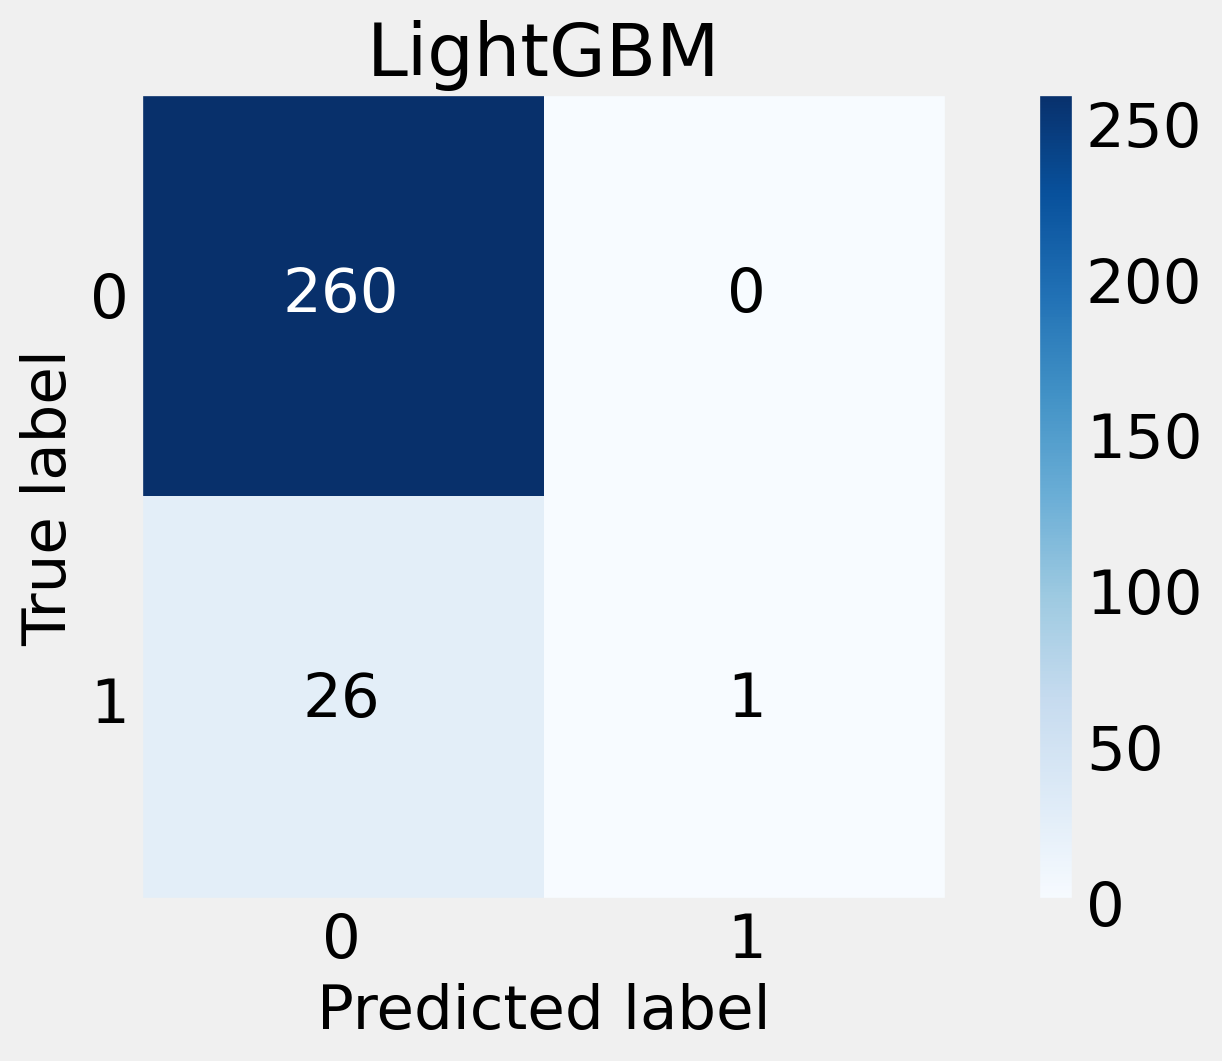

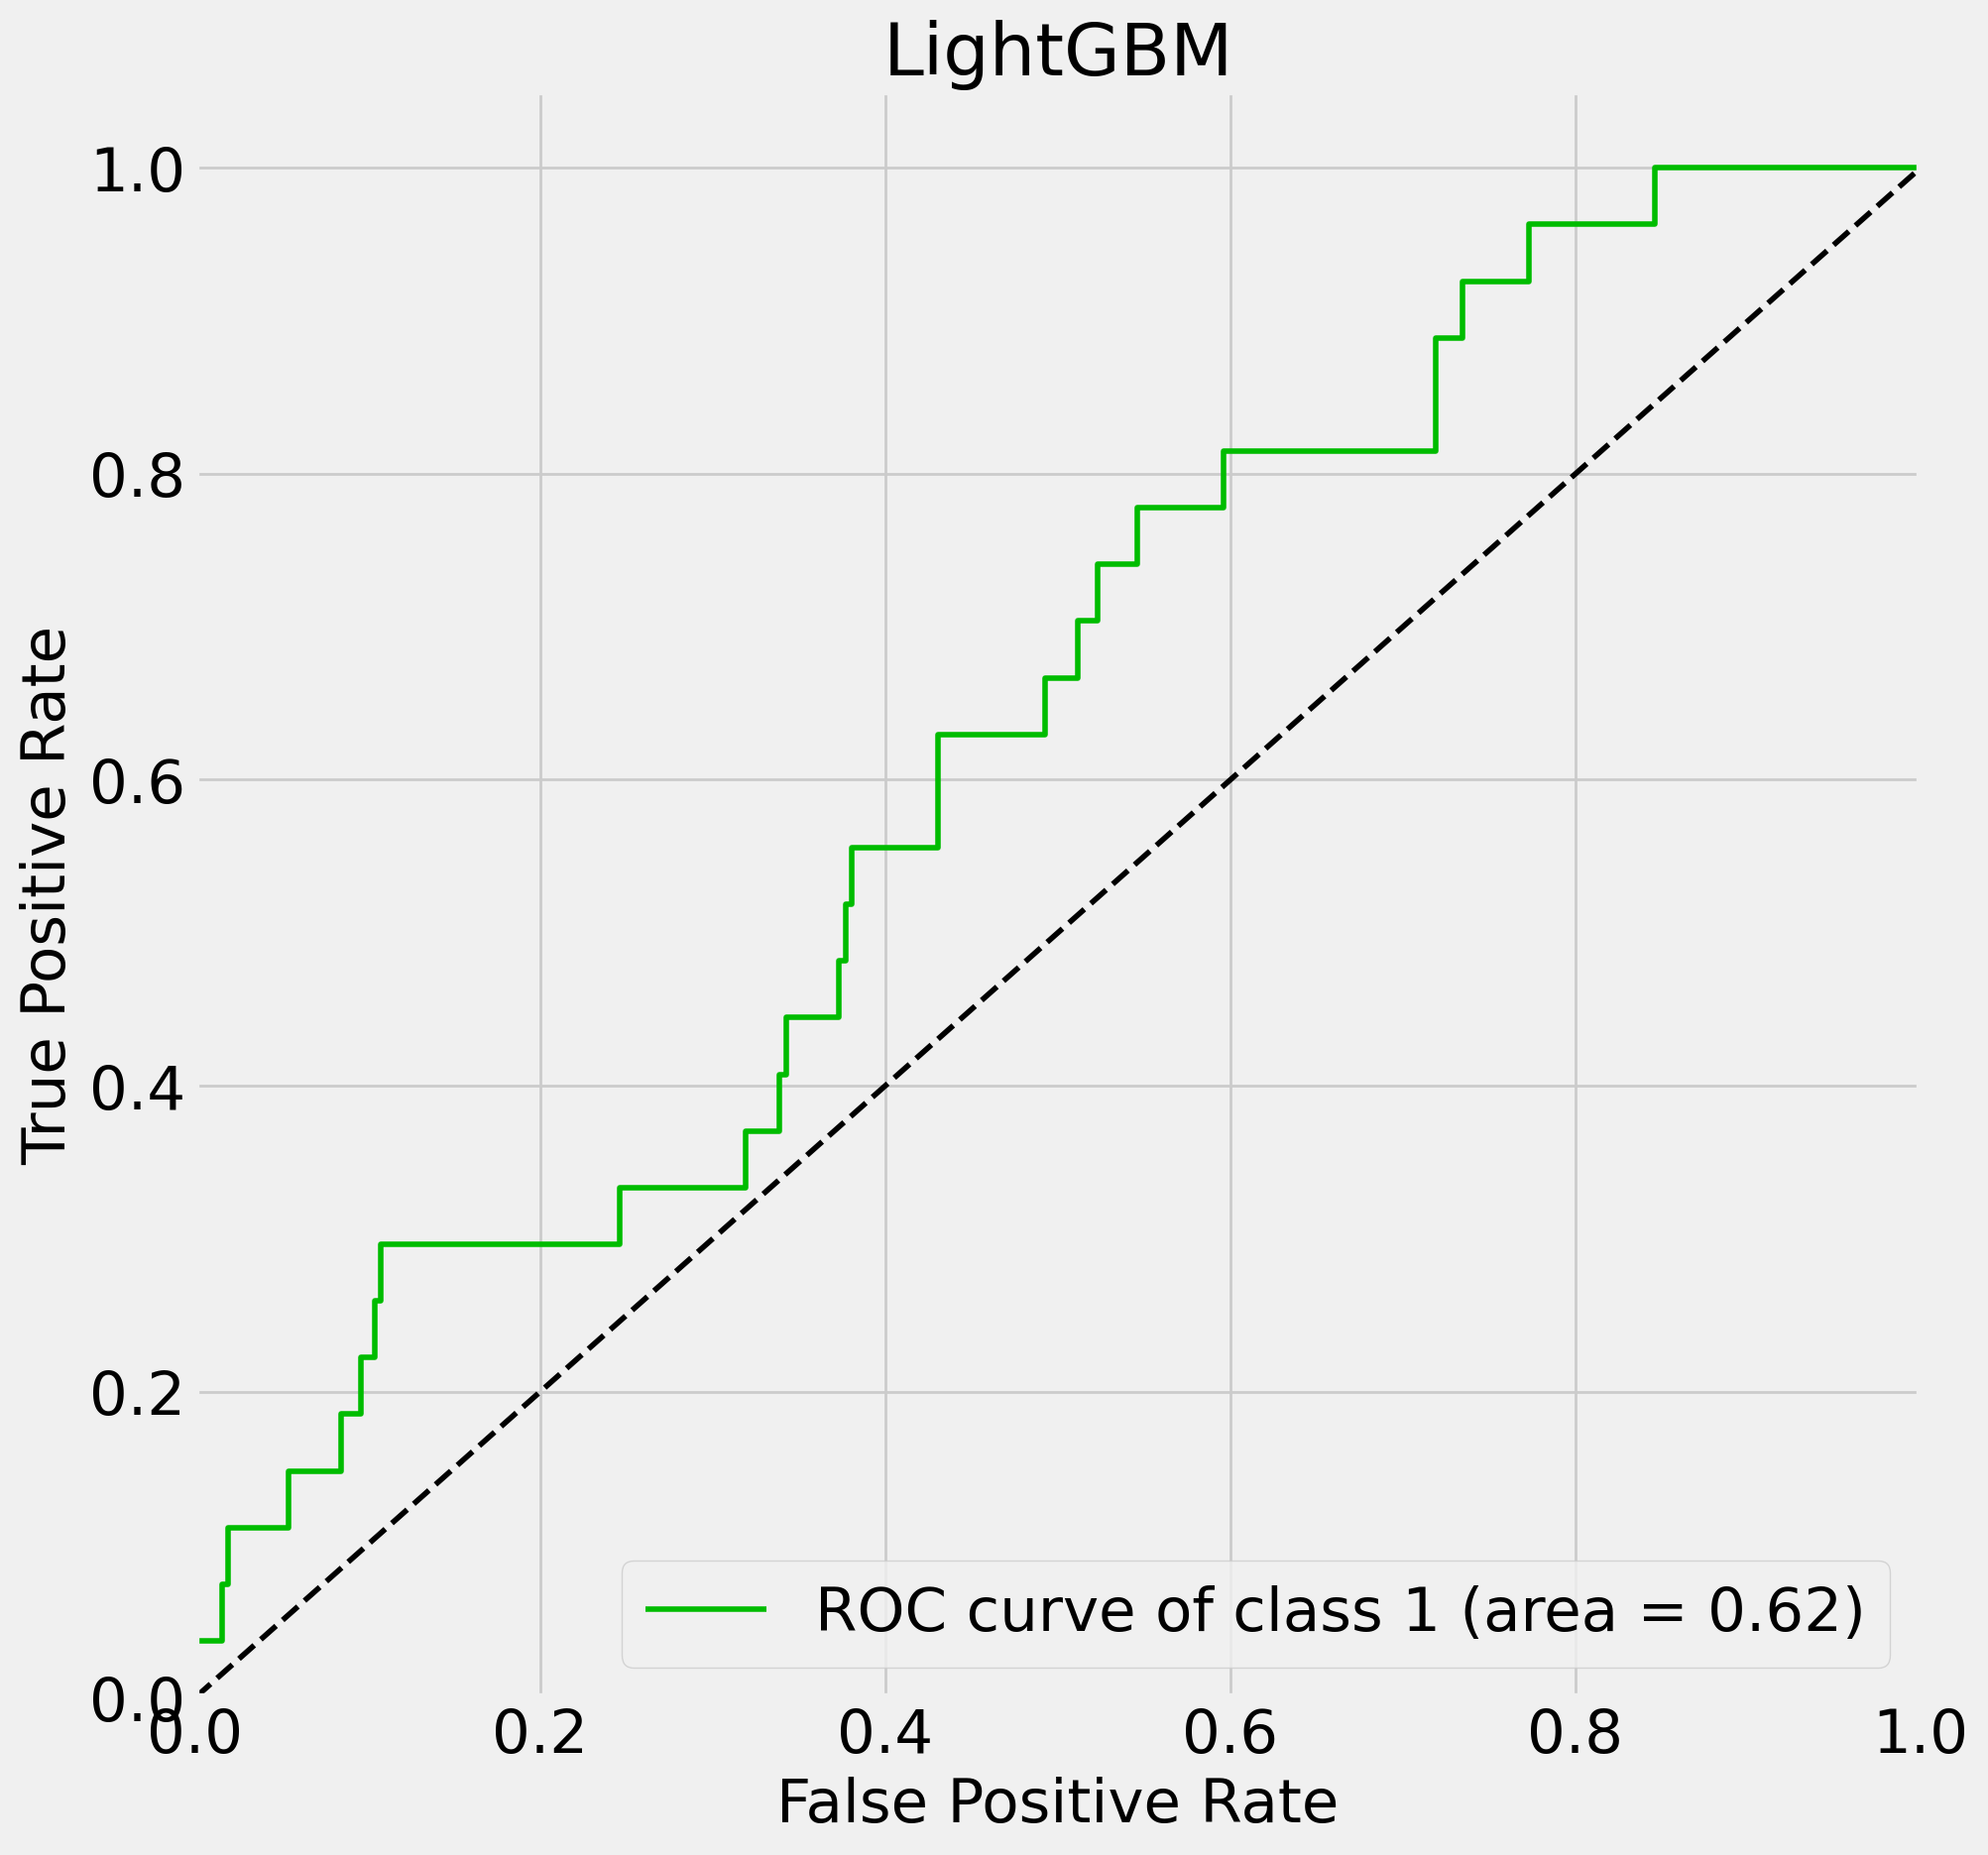

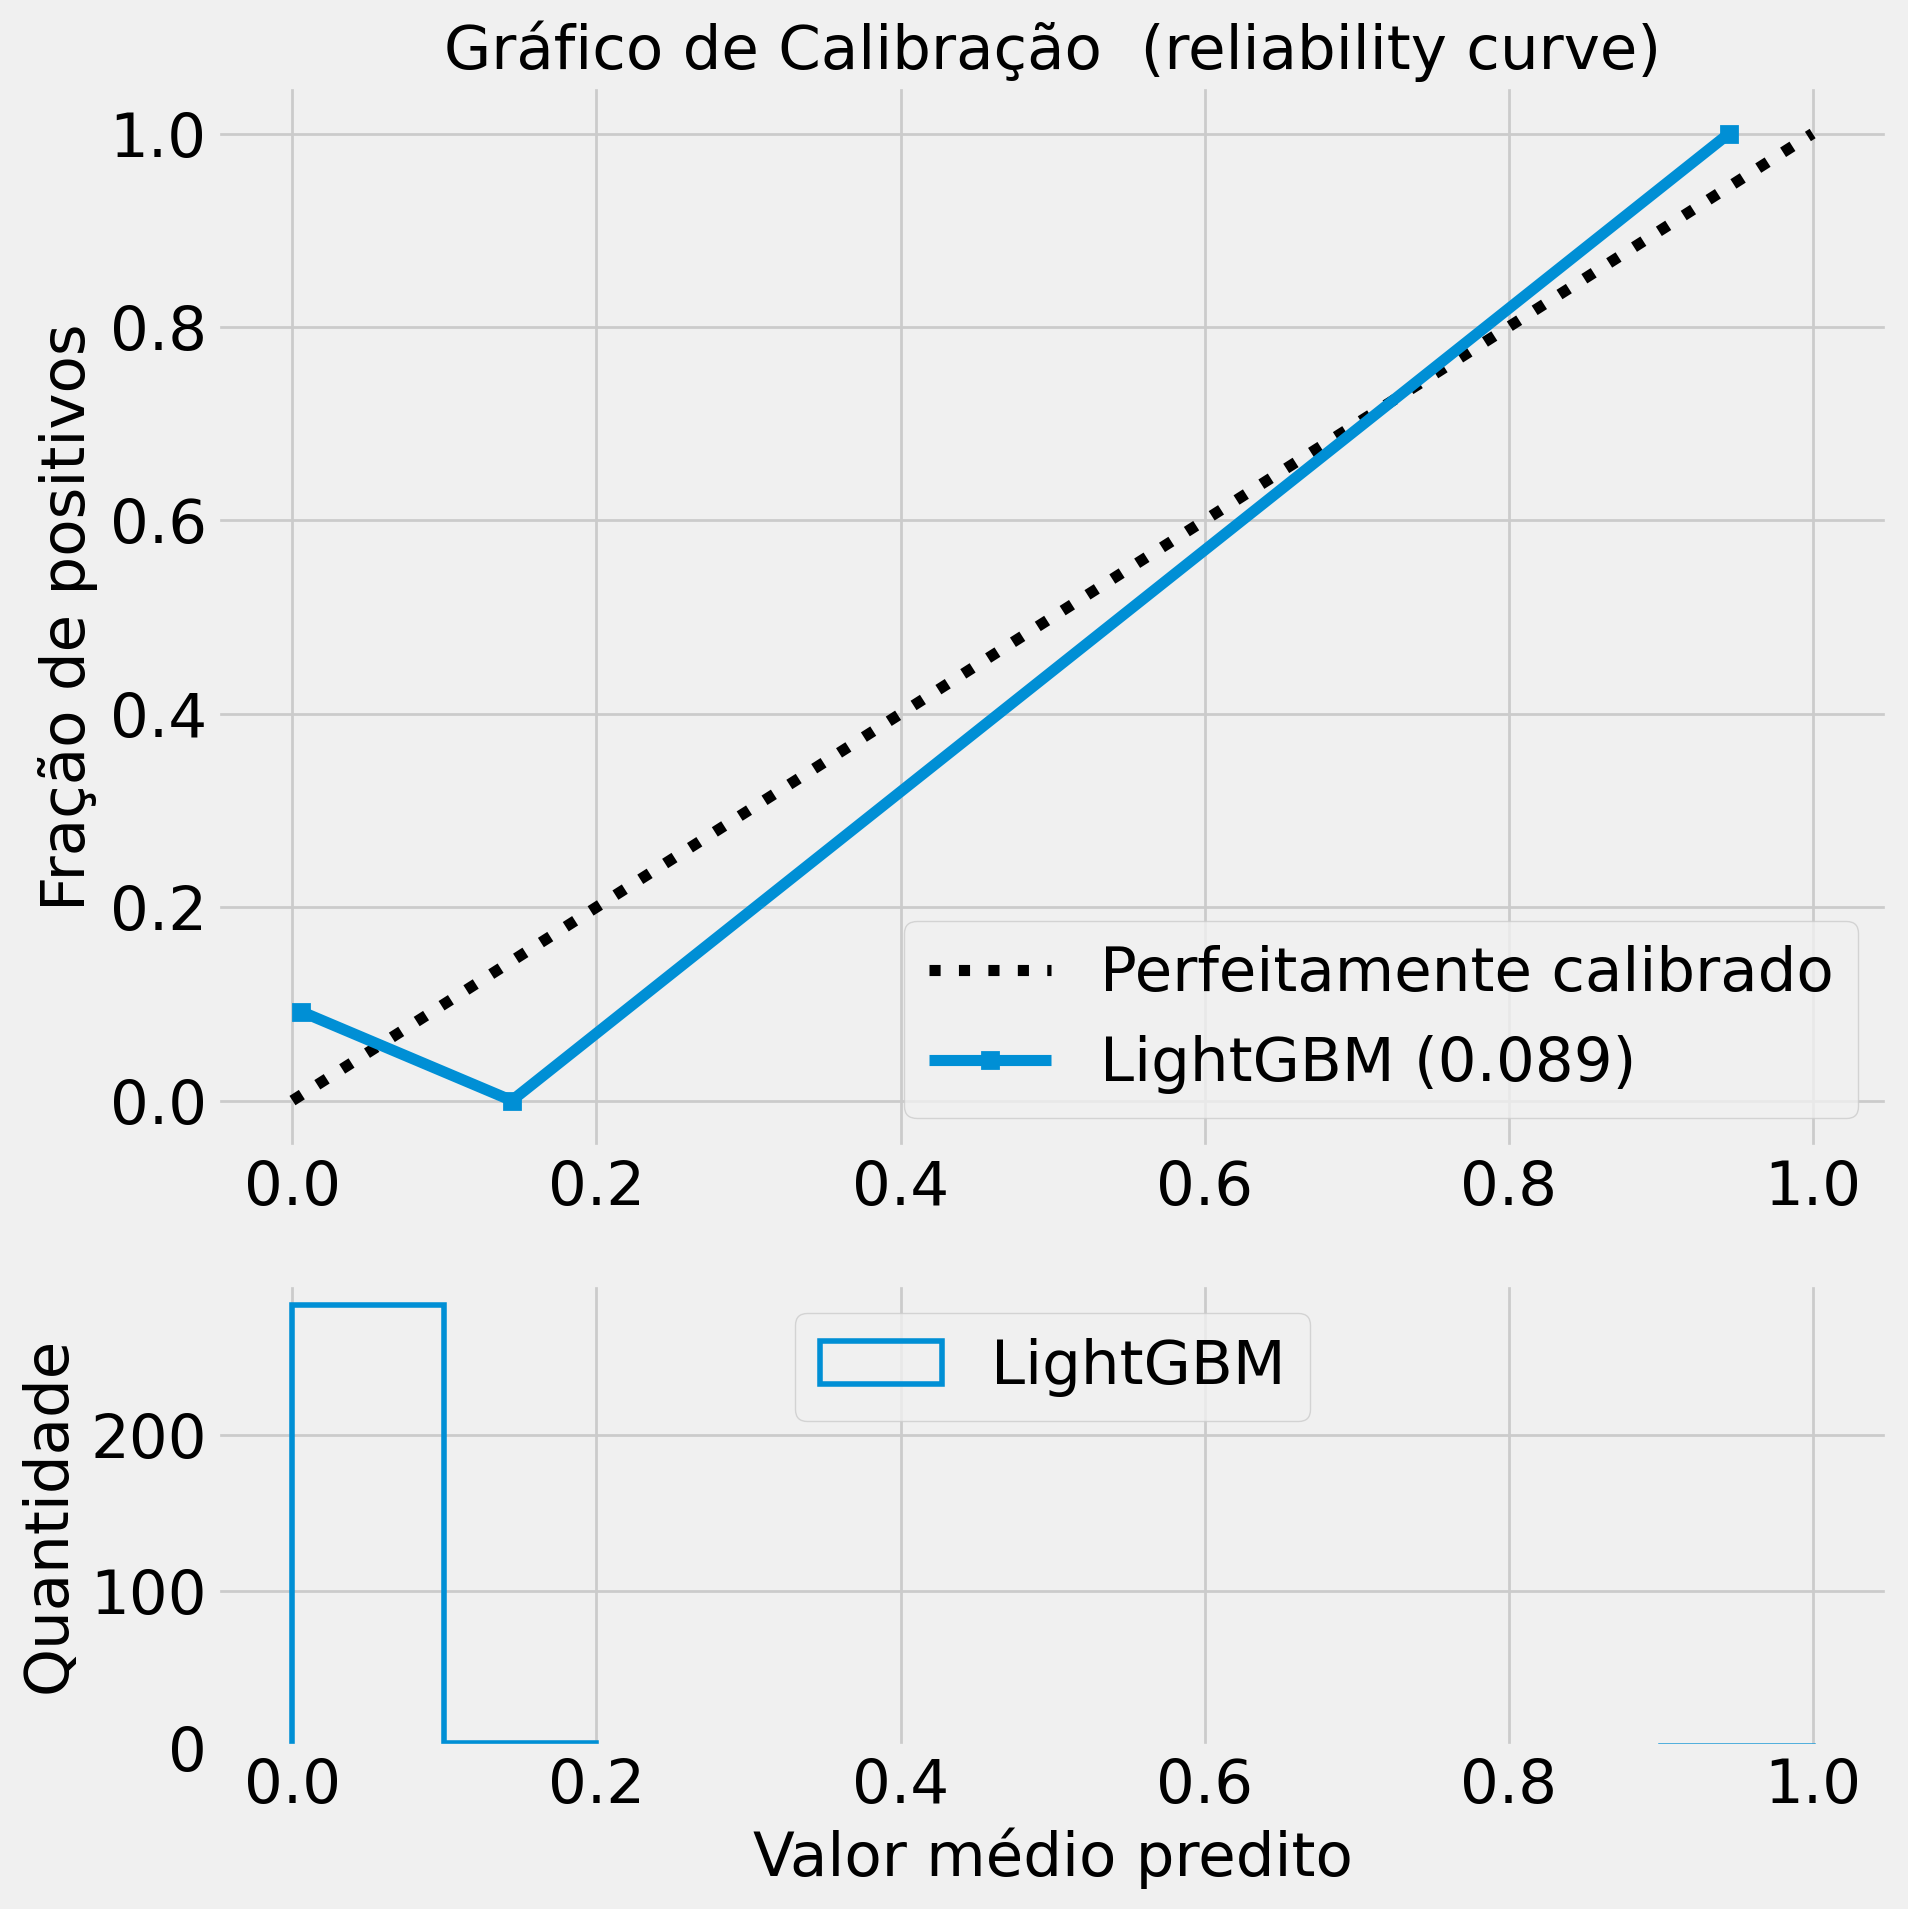

In [48]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier()



runModel(clf_lgbm, X_train, y_train, X_test, y_test, title="LightGBM")


Catboost

In [49]:
!pip install catboost
from catboost import CatBoostClassifier

In [51]:
clf_catboost = CatBoostClassifier()

Learning rate set to 0.010928
0:	learn: 0.6818180	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.6711692	total: 67.4ms	remaining: 33.6s
2:	learn: 0.6609085	total: 70.1ms	remaining: 23.3s
3:	learn: 0.6511354	total: 72.7ms	remaining: 18.1s
4:	learn: 0.6408479	total: 75.3ms	remaining: 15s
5:	learn: 0.6313460	total: 77.5ms	remaining: 12.8s
6:	learn: 0.6219007	total: 79.5ms	remaining: 11.3s
7:	learn: 0.6125532	total: 82.3ms	remaining: 10.2s
8:	learn: 0.6035341	total: 84.5ms	remaining: 9.31s
9:	learn: 0.5951704	total: 86.9ms	remaining: 8.6s
10:	learn: 0.5866612	total: 89.1ms	remaining: 8.01s
11:	learn: 0.5785064	total: 91.2ms	remaining: 7.5s
12:	learn: 0.5704342	total: 93.2ms	remaining: 7.08s
13:	learn: 0.5622715	total: 95.4ms	remaining: 6.72s
14:	learn: 0.5548967	total: 97.8ms	remaining: 6.42s
15:	learn: 0.5470451	total: 99.7ms	remaining: 6.13s
16:	learn: 0.5401105	total: 102ms	remaining: 5.87s
17:	learn: 0.5330904	total: 104ms	remaining: 5.66s
18:	learn: 0.5260098	total: 106ms	remaining: 5.45s

192:	learn: 0.2423266	total: 393ms	remaining: 1.64s
193:	learn: 0.2417889	total: 395ms	remaining: 1.64s
194:	learn: 0.2414147	total: 396ms	remaining: 1.64s
195:	learn: 0.2409131	total: 398ms	remaining: 1.63s
196:	learn: 0.2406712	total: 400ms	remaining: 1.63s
197:	learn: 0.2403860	total: 401ms	remaining: 1.63s
198:	learn: 0.2399963	total: 403ms	remaining: 1.62s
199:	learn: 0.2398172	total: 405ms	remaining: 1.62s
200:	learn: 0.2395654	total: 408ms	remaining: 1.62s
201:	learn: 0.2391444	total: 412ms	remaining: 1.63s
202:	learn: 0.2387499	total: 415ms	remaining: 1.63s
203:	learn: 0.2383026	total: 417ms	remaining: 1.63s
204:	learn: 0.2379836	total: 419ms	remaining: 1.63s
205:	learn: 0.2374650	total: 421ms	remaining: 1.62s
206:	learn: 0.2372058	total: 423ms	remaining: 1.62s
207:	learn: 0.2368694	total: 424ms	remaining: 1.61s
208:	learn: 0.2365622	total: 426ms	remaining: 1.61s
209:	learn: 0.2361344	total: 427ms	remaining: 1.61s
210:	learn: 0.2357727	total: 429ms	remaining: 1.6s
211:	learn: 0

417:	learn: 0.1849102	total: 792ms	remaining: 1.1s
418:	learn: 0.1847121	total: 794ms	remaining: 1.1s
419:	learn: 0.1844482	total: 796ms	remaining: 1.1s
420:	learn: 0.1842455	total: 798ms	remaining: 1.1s
421:	learn: 0.1839845	total: 800ms	remaining: 1.09s
422:	learn: 0.1838626	total: 802ms	remaining: 1.09s
423:	learn: 0.1837345	total: 804ms	remaining: 1.09s
424:	learn: 0.1835828	total: 806ms	remaining: 1.09s
425:	learn: 0.1833985	total: 808ms	remaining: 1.09s
426:	learn: 0.1832125	total: 809ms	remaining: 1.08s
427:	learn: 0.1830013	total: 811ms	remaining: 1.08s
428:	learn: 0.1828314	total: 813ms	remaining: 1.08s
429:	learn: 0.1826595	total: 814ms	remaining: 1.08s
430:	learn: 0.1824416	total: 816ms	remaining: 1.08s
431:	learn: 0.1822528	total: 818ms	remaining: 1.07s
432:	learn: 0.1820881	total: 820ms	remaining: 1.07s
433:	learn: 0.1818519	total: 822ms	remaining: 1.07s
434:	learn: 0.1817242	total: 824ms	remaining: 1.07s
435:	learn: 0.1814666	total: 826ms	remaining: 1.07s
436:	learn: 0.18

654:	learn: 0.1421910	total: 1.19s	remaining: 627ms
655:	learn: 0.1420009	total: 1.19s	remaining: 625ms
656:	learn: 0.1419413	total: 1.19s	remaining: 623ms
657:	learn: 0.1418245	total: 1.2s	remaining: 621ms
658:	learn: 0.1416375	total: 1.2s	remaining: 620ms
659:	learn: 0.1415530	total: 1.2s	remaining: 618ms
660:	learn: 0.1414261	total: 1.2s	remaining: 617ms
661:	learn: 0.1413475	total: 1.2s	remaining: 615ms
662:	learn: 0.1412250	total: 1.21s	remaining: 613ms
663:	learn: 0.1410216	total: 1.21s	remaining: 611ms
664:	learn: 0.1409408	total: 1.21s	remaining: 609ms
665:	learn: 0.1408340	total: 1.21s	remaining: 607ms
666:	learn: 0.1407351	total: 1.21s	remaining: 605ms
667:	learn: 0.1406634	total: 1.21s	remaining: 604ms
668:	learn: 0.1404827	total: 1.22s	remaining: 602ms
669:	learn: 0.1404073	total: 1.22s	remaining: 600ms
670:	learn: 0.1402650	total: 1.22s	remaining: 598ms
671:	learn: 0.1401089	total: 1.22s	remaining: 596ms
672:	learn: 0.1397635	total: 1.22s	remaining: 594ms
673:	learn: 0.139

887:	learn: 0.1094393	total: 1.59s	remaining: 200ms
888:	learn: 0.1093522	total: 1.59s	remaining: 199ms
889:	learn: 0.1091772	total: 1.59s	remaining: 197ms
890:	learn: 0.1091568	total: 1.59s	remaining: 195ms
891:	learn: 0.1088433	total: 1.59s	remaining: 193ms
892:	learn: 0.1086349	total: 1.6s	remaining: 191ms
893:	learn: 0.1083659	total: 1.6s	remaining: 190ms
894:	learn: 0.1082822	total: 1.6s	remaining: 188ms
895:	learn: 0.1081260	total: 1.6s	remaining: 186ms
896:	learn: 0.1080546	total: 1.6s	remaining: 184ms
897:	learn: 0.1079539	total: 1.61s	remaining: 182ms
898:	learn: 0.1078239	total: 1.61s	remaining: 181ms
899:	learn: 0.1077307	total: 1.61s	remaining: 179ms
900:	learn: 0.1075945	total: 1.61s	remaining: 177ms
901:	learn: 0.1075407	total: 1.61s	remaining: 175ms
902:	learn: 0.1073276	total: 1.61s	remaining: 173ms
903:	learn: 0.1072587	total: 1.61s	remaining: 172ms
904:	learn: 0.1070386	total: 1.62s	remaining: 170ms
905:	learn: 0.1068059	total: 1.62s	remaining: 168ms
906:	learn: 0.106

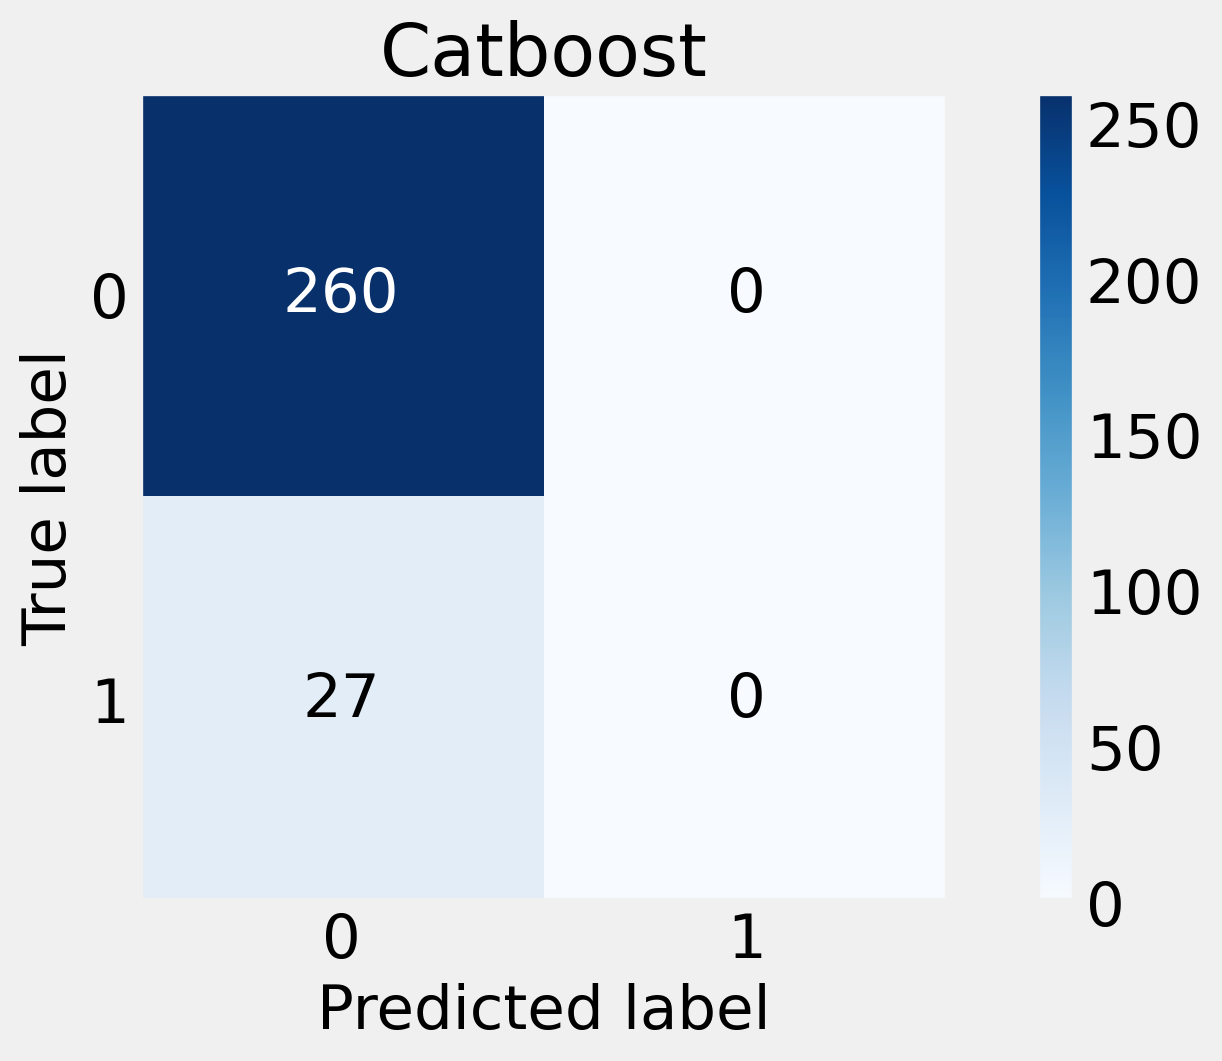

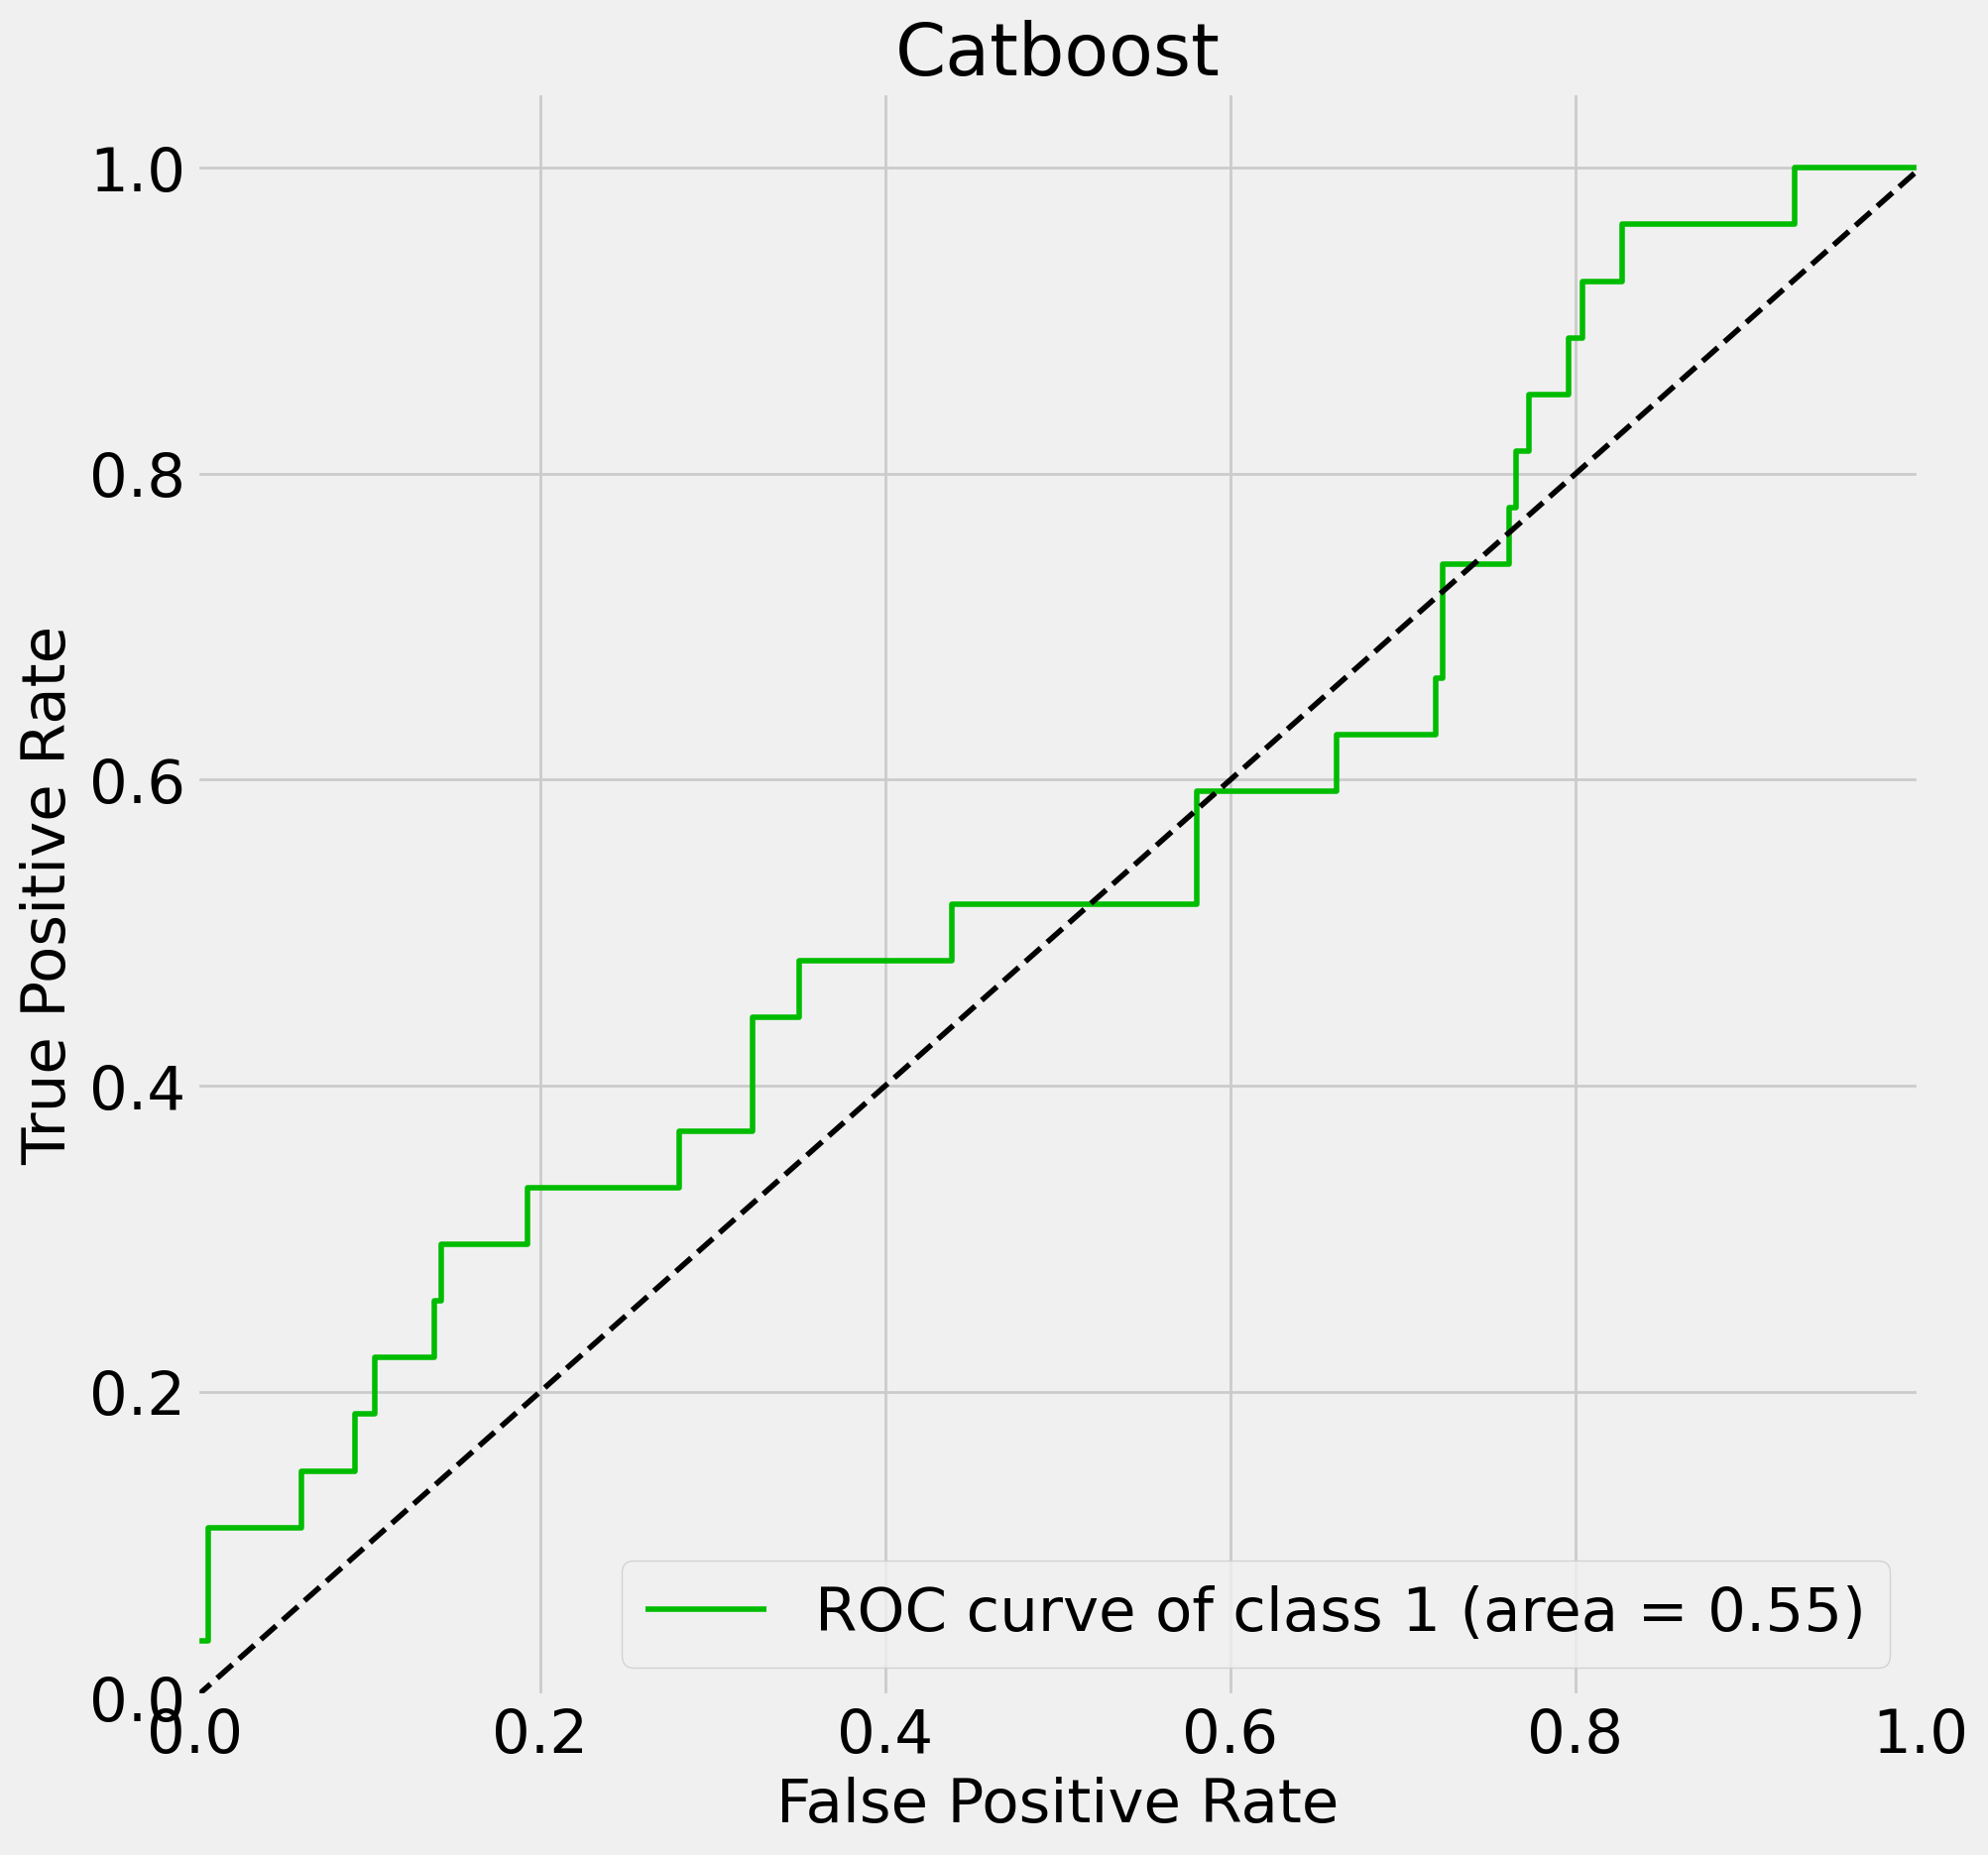

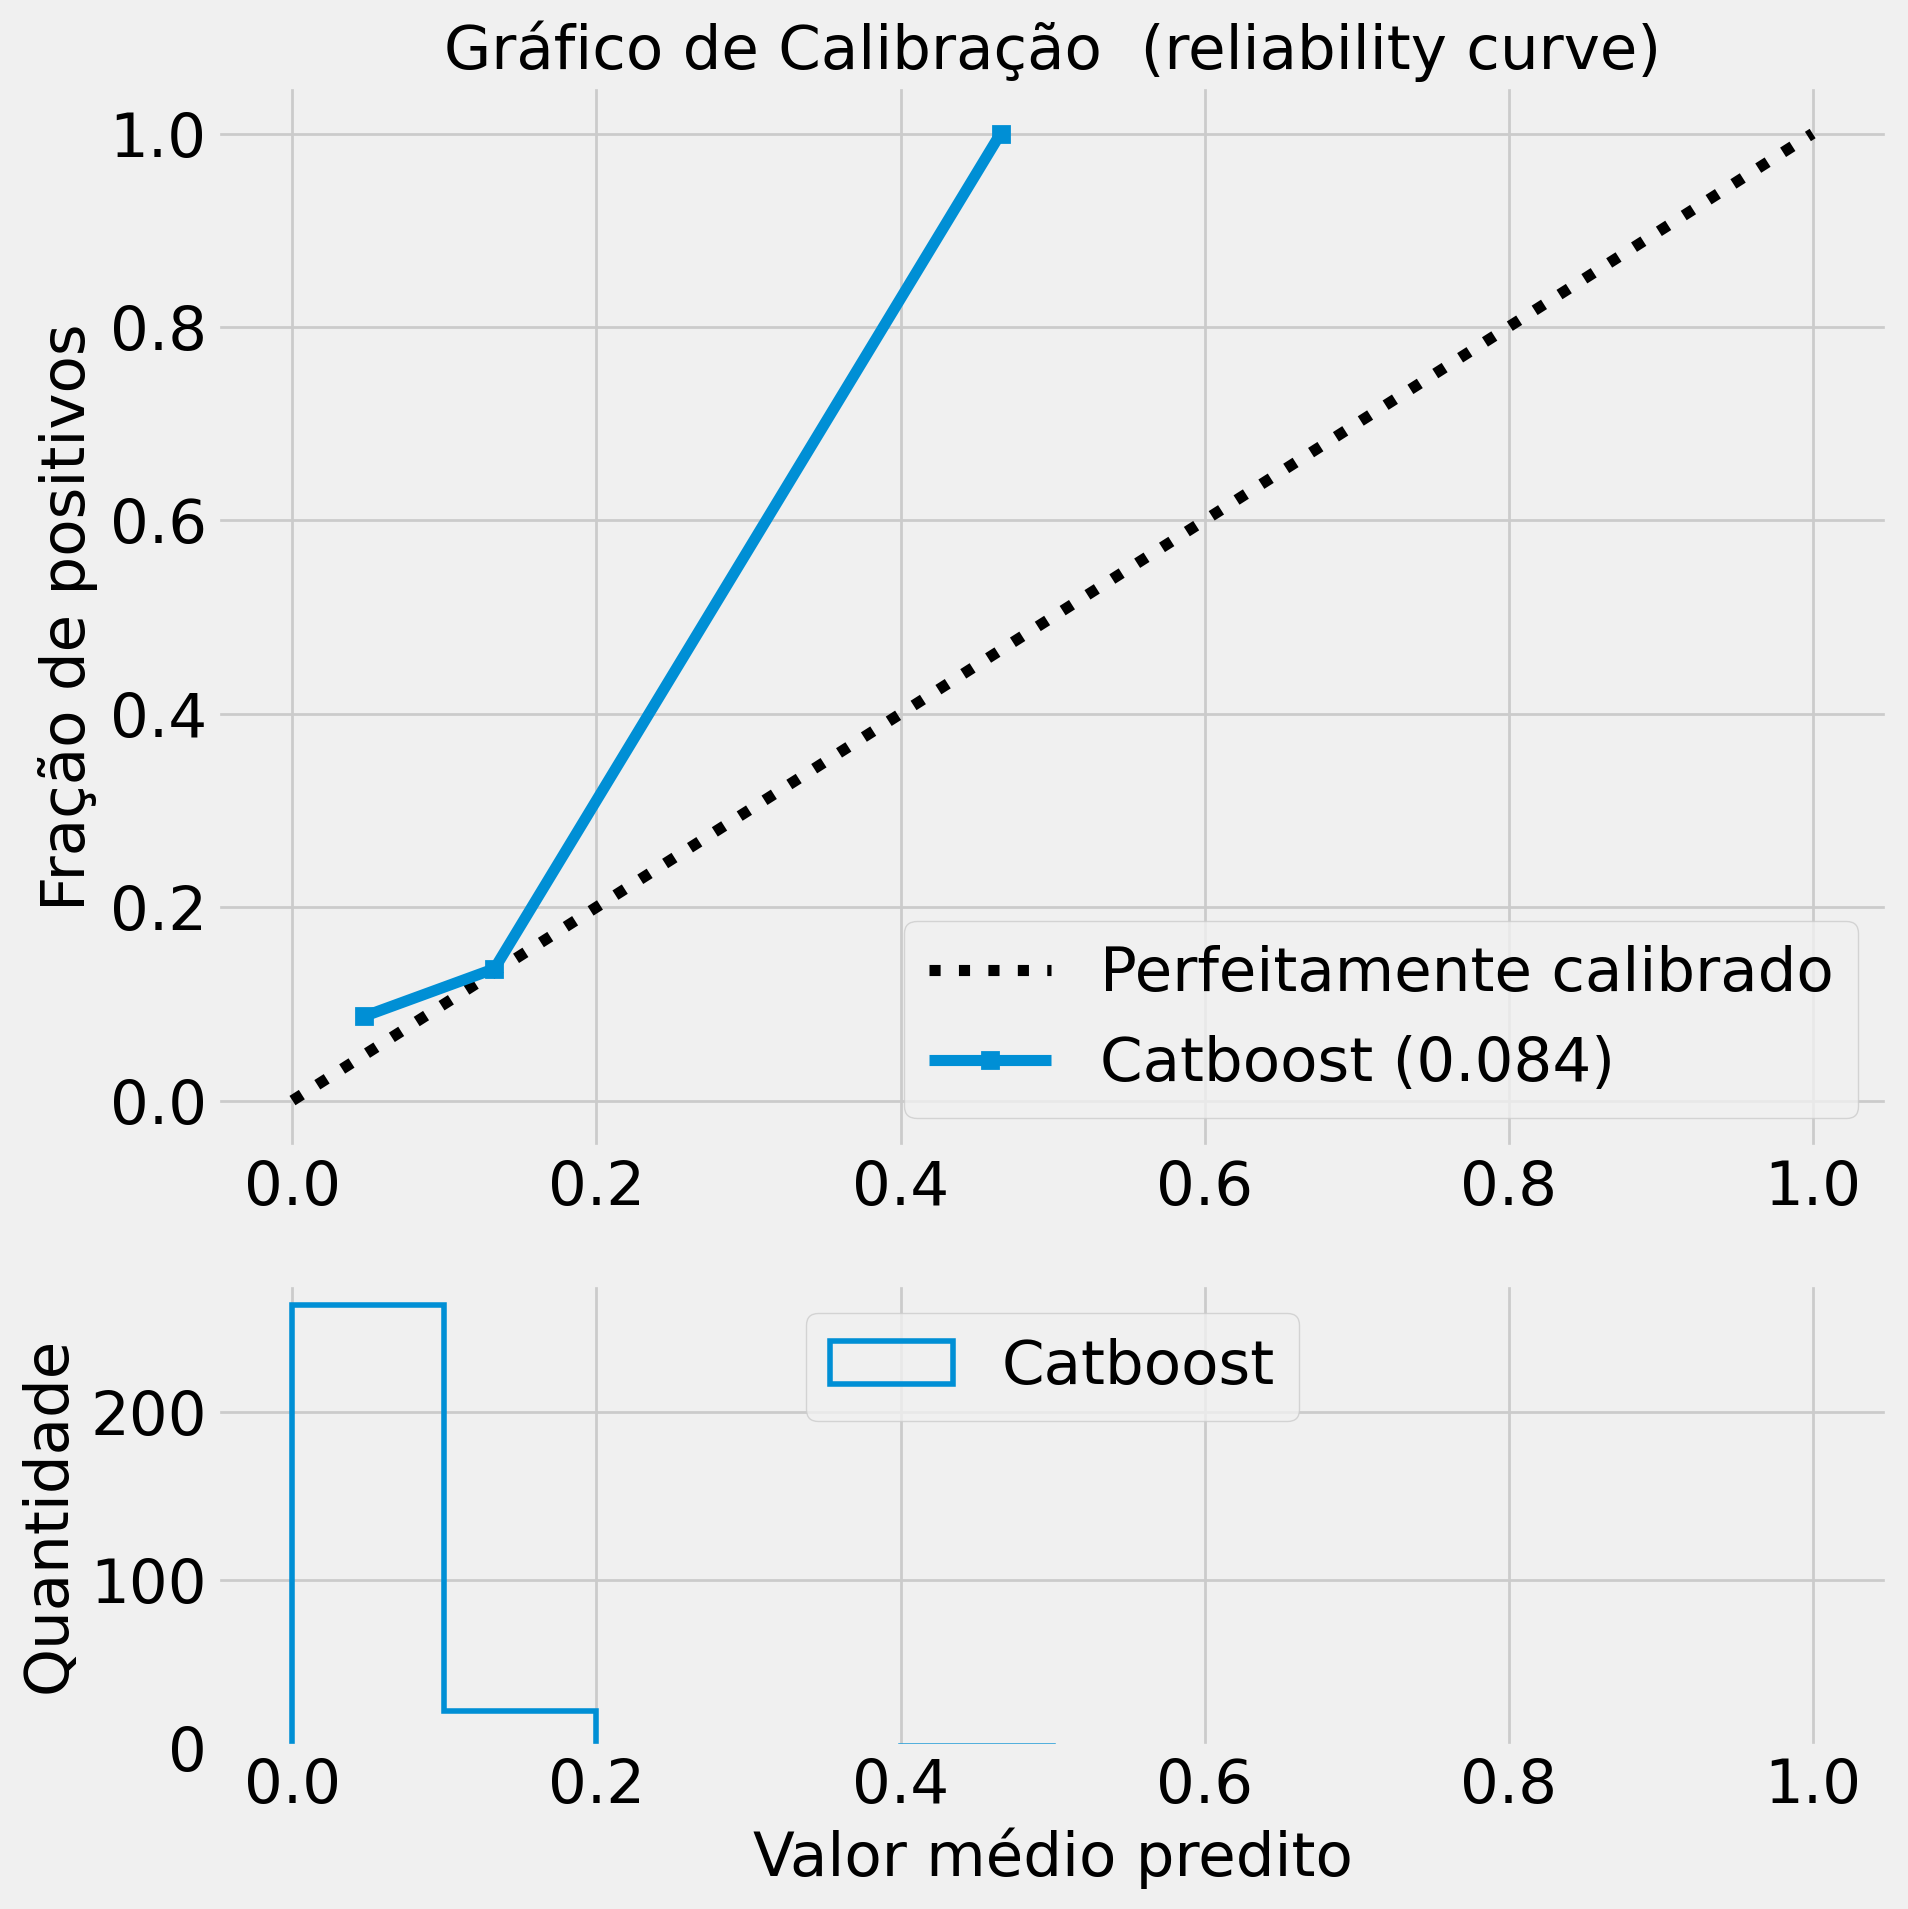

In [52]:
runModel(clf_catboost, X_train, y_train, X_test, y_test, title="Catboost")

Modelos de predicao sem Automatizacao 

In [53]:
!pip install catboost
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [54]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
prob_pos_rf = rf.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Random Forest Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_rf)))

print(classification_report(y_test, y_pred_rf))

Random Forest Model
Accuracy: 0.9094
Precision: 1.0000
Recall: 0.0370
AUC: 0.6502
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       1.00      0.04      0.07        27

    accuracy                           0.91       287
   macro avg       0.95      0.52      0.51       287
weighted avg       0.92      0.91      0.87       287



In [55]:
# xgboost
clf_xgboost = xgb.XGBClassifier()
clf_xgboost.fit(X_train, y_train)

y_pred_xgboost = clf_xgboost.predict(X_test)
prob_pos_xgboost = clf_xgboost.predict_proba(X_test)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, y_pred_xgboost))

XGBoost Model
Accuracy: 0.9094
Precision: 1.0000
Recall: 0.0370
AUC: 0.6148
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       1.00      0.04      0.07        27

    accuracy                           0.91       287
   macro avg       0.95      0.52      0.51       287
weighted avg       0.92      0.91      0.87       287



In [56]:
# LightGBM
clf_lgbm = lgb.LGBMClassifier()
clf_lgbm.fit(X_train, y_train)

y_pred_lgbm = clf_lgbm.predict(X_test)
prob_pos_lgbm = clf_lgbm.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('LightGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_lgbm)))


print(classification_report(y_test, y_pred_lgbm))

# quero ver o desemepenho no treino também
# prob_pos_lgbm_treino = clf_lgbm.predict_proba(X_train)[:,1]
# print("AUC treino: {:.4f}".format(roc_auc_score(y_train, prob_pos_lgbm_treino)))


[LightGBM] [Info] Number of positive: 99, number of negative: 1049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4280
[LightGBM] [Info] Number of data points in the train set: 1148, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086237 -> initscore=-2.360473
[LightGBM] [Info] Start training from score -2.360473
LightGBM Model
Accuracy: 0.9094
Precision: 1.0000
Recall: 0.0370
AUC: 0.6229
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       1.00      0.04      0.07        27

    accuracy                           0.91       287
   macro avg       0.95      0.52      0.51       287
weighted avg       0.92      0.91      0.87       287



In [57]:
# Catboost
clf_catboost = CatBoostClassifier(iterations = 5)
clf_catboost.fit(X_train, y_train)

y_pred_catboost =clf_catboost.predict(X_test)
prob_pos_catboost = clf_catboost.predict_proba(X_test)[:,1]


from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import classification_report

print('Catboost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_catboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_catboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_catboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_catboost)))

print(classification_report(y_test, y_pred_catboost))

Learning rate set to 0.5
0:	learn: 0.3552731	total: 4.79ms	remaining: 19.2ms
1:	learn: 0.2921616	total: 9.72ms	remaining: 14.6ms
2:	learn: 0.2716641	total: 11.6ms	remaining: 7.72ms
3:	learn: 0.2534395	total: 13.5ms	remaining: 3.37ms
4:	learn: 0.2397253	total: 15.3ms	remaining: 0us
Catboost Model
Accuracy: 0.9059
Precision: 0.0000
Recall: 0.0000
AUC: 0.5207
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       0.00      0.00      0.00        27

    accuracy                           0.91       287
   macro avg       0.45      0.50      0.48       287
weighted avg       0.82      0.91      0.86       287



In [58]:
col_names = ["Modelo", "Accuracy", "Precision", "Recall", "AUC(ROC)"]

data = [["Random Forest", accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),roc_auc_score(y_test, prob_pos_rf)],
        ["XGBoost", accuracy_score(y_test, y_pred_xgboost),precision_score(y_test, y_pred_xgboost),recall_score(y_test, y_pred_xgboost),roc_auc_score(y_test, prob_pos_xgboost)],
        ["LightGBM", accuracy_score(y_test, y_pred_lgbm),precision_score(y_test, y_pred_lgbm),recall_score(y_test, y_pred_lgbm),roc_auc_score(y_test, prob_pos_lgbm)],
        ["Catboost", accuracy_score(y_test, y_pred_catboost),precision_score(y_test, y_pred_catboost),recall_score(y_test, y_pred_catboost),roc_auc_score(y_test, prob_pos_catboost)]]
  

In [59]:
import pandas as pd
import numpy as np

# Opção para ajustar a formatação de números flutuantes
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print('Resultados para conjunto de teste.')
# Supondo que 'data' e 'col_names' já estão definidos
df_results = pd.DataFrame(data, columns=col_names)

# Função para destacar os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == object: 
        is_max = [False for _ in range(s.shape[0])]  # Sem highlight para tipo objeto
    else:
        is_max = s == s.max()  # Highlight para o valor máximo
    return ['background: yellow' if cell else '' for cell in is_max]

# Aplicando a função de destaque ao DataFrame
df_results.style.apply(highlight_max)


Resultados para conjunto de teste.


,Modelo,Accuracy,Precision,Recall,AUC(ROC)
0,Random Forest,0.909408,1.000000,0.037037,0.650214
1,XGBoost,0.909408,1.000000,0.037037,0.614815
2,LightGBM,0.909408,1.000000,0.037037,0.622934
3,Catboost,0.905923,0.000000,0.000000,0.520655


Seleção de Variáveis - BORUTA

In [60]:
!pip install boruta

In [64]:
pip install numpy==1.19.5


  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1032 lines of output]
      setup.py:67: RuntimeWarning: NumPy 1.19.5 may not yet support Python 3.11.
        warnings.warn(
      Running from numpy source directory.
      numpy/random/_bounded_integers.pxd.in has not changed
      numpy/random/_philox.pyx has not changed
      numpy/random/_bounded_integers.pyx.in has not changed
      numpy/random/_sfc64.pyx has not changed
      numpy/random/_mt19937.pyx has not changed
      numpy/random/bit_generator.pyx has not changed
      Processing numpy/random/_bounded_integers.pyx
      numpy/random/mtrand.pyx has not changed
      numpy/random/_generator.pyx has not changed
      numpy/random/_pcg64.pyx has not changed
      nump

Note: you may need to restart the kernel to use updated packages.


In [65]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# criando estimador para o Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# criando estimador para o Boruta
forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

In [422]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['idademae', 'qtdfilvivo', 'consprenat', 'sexo', 'paridade', 'escmae_3', 'gravidez_1', 'gravidez_2', 'gravidez_3']]

X_test_boruta = X_test[['idademae', 'qtdfilvivo', 'consprenat', 'sexo', 'paridade', 'escmae_3', 'gravidez_1', 'gravidez_2', 'gravidez_3']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)

KeyError: "None of [Index(['idademae', 'qtdfilvivo', 'consprenat', 'sexo', 'paridade', 'escmae_3',\n       'gravidez_1', 'gravidez_2', 'gravidez_3'],\n      dtype='object')] are in the [columns]"

In [66]:
# Retreinando os algoritmos

In [67]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# criando estimator para o Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [68]:
# xgboost
clf_xgboost_boruta = xgb.XGBClassifier()
clf_xgboost_boruta.fit(X_train_boruta, y_train)

y_pred_xgboost_boruta = clf_xgboost_boruta.predict(X_test_boruta)
prob_pos_xgboost_boruta = clf_xgboost_boruta.predict_proba(X_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_boruta)))

print(classification_report(y_test, y_pred_xgboost))

NameError: name 'X_train_boruta' is not defined

In [70]:
# comparando os resultados do teste

In [69]:
print("###### XGBOOST SEM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost)))

print(classification_report(y_test, y_pred_xgboost))

print("\n", "###### XGBOOST COM BORUTA #####")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost_boruta)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost_boruta)))
print("AUC: {:.4f}".format(roc_auc_score(y_test, prob_pos_xgboost_boruta)))

print(classification_report(y_test, y_pred_xgboost))

###### XGBOOST SEM BORUTA #####
Accuracy: 0.9094
Precision: 1.0000
Recall: 0.0370
AUC: 0.6148
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       260
           1       1.00      0.04      0.07        27

    accuracy                           0.91       287
   macro avg       0.95      0.52      0.51       287
weighted avg       0.92      0.91      0.87       287


 ###### XGBOOST COM BORUTA #####


NameError: name 'y_pred_xgboost_boruta' is not defined

In [70]:
X_train.columns

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre',
       'a_rendpcr', 'a_escola', 'a_hb', 'b_hb', 'a_npari', 'a_npcomo',
       'a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl',
       'a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm',
       'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct', 'a_civil_1', 'a_civil_2',
       'a_civil_3', 'a_civil_4', 'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4',
       'a_cor_5', 'a_alcool_0', 'a_alcool_1', 'b_alcool_0', 'b_alcool_1',
       'a_vigord_0', 'a_vigord_1', 'a_vigord_2', 'a_vigord_3', 'a_vigord_4',
       'a_vigord_5', 'a_vigord_6', 'a_vigord_7', 'b_vigord_0', 'b_vigord_1',
       'a_moderd_0', 'a_moderd_1', 'a_moderd_2', 'a_moderd_3', 'a_moderd_4',
       'a_moderd_5', 'a_moderd_6', 'a_moderd_7', 'b_moderd_0', 'b_moderd_1',
       'b_fumog_0', 'b_fumog_1', 'a_fumog_0', 'a_fumog_1', 'a_agdm_0',
       'a_agdm_1', 'b_agdm_0', 'b_agdm_1', 'a_aghas_0', 'a_aghas_1',
       'b_aghas_0', 'b_agha

In [71]:
X_train_boruta.columns

NameError: name 'X_train_boruta' is not defined

Importancia das variaveis pelo Shapley

In [72]:
!pip install shap
import shap

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c0/bc/77635c657a3668cf652806210b8662e1aff84b818a55ba88257abf6637a8/numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


ImportError: Numba needs NumPy 1.24 or less

In [73]:
# resultados no teste
shap_values_test = shap.TreeExplainer(clf_xgboost_boruta).shap_values(X_test_boruta)
shap.summary_plot(shap_values_test, X_test_boruta, plot_type="bar")

NameError: name 'shap' is not defined

In [74]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(clf_xgboost_boruta)
shap_values = explainer.shap_values(X_test_boruta)

i = 0
# Inserindo os dados do paciente
print('Desfecho do paciente:', y_test[i])
print('Predição:', y_pred_xgboost_boruta[i])

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_boruta.iloc[i,:])

NameError: name 'shap' is not defined

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(clf_xgboost_boruta)
shap_values = explainer.shap_values(X_test_boruta)

i = 0
# Inserindo os dados do paciente
print('Desfecho do paciente:', y_test[i])
print('Predição:', y_pred_xgboost_boruta[i])

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_boruta.iloc[i,:])